In [1]:
import pandas as pd

# 读取 Excel 文件中的所有表格 manything/protein_net/41588_2018_130_MOESM3_ESM.xlsx
file_path = '../manything/protein_net/EE_gene.xlsx'
# file_path = '../manything/protein_net/41588_2018_130_MOESM6_ESM.xlsx'
sheets = pd.read_excel(file_path, sheet_name=None, header=None)

# 将每个表格存储到单独的 DataFrame
dataframes = {sheet_name: df for sheet_name, df in sheets.items()}
importants = []
# 打印每个 DataFrame 的名称和前几行
for name, df in dataframes.items():
    print(f"表格名称: {name}")
    # print(len(set(df[0].tolist()) & set(pros['preferred_name'].tolist())), len(df[0].tolist()))  # 打印前几行
    importants.append(df[0].tolist())
len(importants), len(importants[0])


表格名称: Sheet1
表格名称: Sheet2
表格名称: Sheet3
表格名称: Sheet4
表格名称: Sheet5
表格名称: Sheet6
表格名称: Sheet7


(7, 46)

In [2]:
import gseapy as gp
import math
gene_sets = {}
with open("../manything/KEGG_2021_Human.txt", 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        pathway = parts[0]
        genes = [g for g in parts[2:] if g]  # Skip empty strings
        gene_sets[pathway] = genes

# Perform enrichment analysis

important_GO = [
    "Amino acid metabolism",
    "Neuroactive ligand-receptor interaction",
    "Cytokine-cytokine receptor interaction",
    "Calcium signaling pathway",
    "Synaptic vesicle cycle"
]
ssss = {}
for key in gene_sets.keys():
    ssss[key] = []
result = []
number = []
for use_gene in importants:
    sample_result = []
    # use_gene = sample[0] + sample[1] + sample[3]
    # print(len(use_gene))
    number.append(len(use_gene))
    enr = gp.enrichr(gene_list=use_gene, # or "./tests/data/gene_list.txt",
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
    pandas_use = enr.results
    for GO in important_GO:
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            sample_result.append(-math.log10(p_value))
        else:
            sample_result.append(0)  # 未找到，填充 0
    for GO in gene_sets.keys():
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            ssss[GO].append(-math.log10(p_value))
        else:
            ssss[GO].append(0)  # 未找到，填充 0
    
    # result.append(normalize_to_zero_one(sample_result))
    result.append(sample_result)
    # if len(result) == 30:
    #     break
# Calculate the average for each GO term in ssss
average_scores = {go: (sum(scores) / len(scores) if scores else 0) for go, scores in ssss.items()}

# Find the top 5 GO terms with the highest average scores
top_5_go = sorted(average_scores.items(), key=lambda item: item[1], reverse=True)[:14]

# Print the results
important_GO = []
for go_term, avg_score in top_5_go:
    print("GO term:", go_term, "Average score:", avg_score)
    important_GO.append(go_term)

GO term: Basal cell carcinoma Average score: 3.7392503719599395
GO term: Pathways in cancer Average score: 3.343127591907557
GO term: Gastric cancer Average score: 3.140869507704721
GO term: Human papillomavirus infection Average score: 2.868895626141204
GO term: Proteoglycans in cancer Average score: 2.7945503457658374
GO term: Breast cancer Average score: 2.7767561886719925
GO term: Alzheimer disease Average score: 2.753007511671749
GO term: Hepatocellular carcinoma Average score: 2.692843354323061
GO term: Prostate cancer Average score: 2.5252828423509017
GO term: mTOR signaling pathway Average score: 2.252645901409376
GO term: Hippo signaling pathway Average score: 2.149651248501914
GO term: Melanogenesis Average score: 2.1389775224392
GO term: Signaling pathways regulating pluripotency of stem cells Average score: 2.1262143137584415
GO term: Pathways of neurodegeneration Average score: 2.0824330657839005


In [7]:
import networkx as nx
G = nx.read_gml('../manything/graph_ppi_only_p.gml')

In [9]:
len(list(G.neighbors('TUBA1A')))

532

In [3]:
import gseapy as gp
import math
gene_sets = {}
import pandas as pd
# samples = pd.read_csv('../manything/ASD_use.csv')
# samples = samples[samples['PrimaryPhenotype'] == 'Autism (ASD)']
# samples['PrimaryPhenotype'].value_counts(), samples.shape
with open("../manything/KEGG_2021_Human.txt", 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        pathway = parts[0]
        genes = [g for g in parts[2:] if g]  # Skip empty strings
        gene_sets[pathway] = genes

# Perform enrichment analysis

# important_GO = [
#     "Amino acid metabolism",
#     "Neuroactive ligand-receptor interaction",
#     "Cytokine-cytokine receptor interaction",
#     "Calcium signaling pathway",
#     "Synaptic vesicle cycle"
# ]
ssss = {}
for key in gene_sets.keys():
    ssss[key] = []
result = []
number = []
numberb = []

ssss = {}
for key in gene_sets.keys():
    ssss[key] = []
buer = []

nnnn = 30
import json
with open('../manything/disease_onlyp_EE.json', 'r') as f:
    CDH_list = json.load(f)

# for index, sample in enumerate(CDH_list):
#     use_gene = list(G.neighbors(sample['mutation']))
#     # if any(item not in sample['nab'][0]+sample['nab'][1]+sample['nab'][2]+sample['nab'][3] for item in use_gene):
#     #     print('err0')
#     #     break

#     for class_index in range(len(sample['nab'])):
#         CDH_list[index]['nab'][class_index] = [gene for gene in CDH_list[index]['nab'][class_index] if gene in use_gene]

for idx, sample in enumerate(CDH_list):
    if len(buer) == nnnn + 1:
        break
    sample_result = []
    samplep = sample['nab']
    use_gene = samplep[0] + samplep[1] + samplep[3]# + [samples.iloc[idx]['Gene.refGene']]
    # print(len(use_gene))
    geneuse = sample['mutation']
    number.append(len(use_gene))
    numberb.append(len(samplep[0] + samplep[1] + samplep[2] + samplep[3]))
    if len(use_gene) == 0:
        result.append([0 for _ in range(len(important_GO))])

        sample_buer = []
        # print(len(use_gene))
        for GO in important_GO:
            
            if geneuse in gene_sets[GO]:  # 检查是否找到匹配项
                sample_buer.append(1)
                print(geneuse, GO, idx)
            else:
                sample_buer.append(0)  # 未找到，填充 0
        buer.append(sample_buer)
        
        continue
    enr = gp.enrichr(gene_list=use_gene, # or "./tests/data/gene_list.txt",
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
    pandas_use = enr.results
    if len(pandas_use) == 0:
        print(idx)
        result.append([0 for _ in range(len(important_GO))])
        sample_buer = []
        for GO in important_GO:
            
            if geneuse in gene_sets[GO]:  # 检查是否找到匹配项
                sample_buer.append(1)
                print(geneuse, GO, idx)
            else:
                sample_buer.append(0)  # 未找到，填充 0
        buer.append(sample_buer)



        
        continue
    for GO in important_GO:
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            
            sample_result.append(-math.log10(p_value))

            # p_value = item['Overlap'].values[0]  # 提取 P-value
            
            # sample_result.append(int(p_value.split('/')[0]))
        else:
            sample_result.append(0)  # 未找到，填充 0
    for GO in gene_sets.keys():
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            ssss[GO].append(-math.log10(p_value))
        else:
            ssss[GO].append(0)  # 未找到，填充 0
    
    # result.append(normalize_to_zero_one(sample_result))
    result.append(sample_result)


    sample_buer = []
    # print(len(use_gene))
    for GO in important_GO:
        
        if geneuse in gene_sets[GO]:  # 检查是否找到匹配项
            sample_buer.append(1)
            print(geneuse, GO, idx)
        else:
            sample_buer.append(0)  # 未找到，填充 0
    buer.append(sample_buer)
    if len(buer) == nnnn:
        break

2025-04-29 07:19:15,302 [ERROR] No hits returned for all input gene sets!


MAPT Alzheimer disease 2
MAPT Pathways of neurodegeneration 2
3


2025-04-29 07:19:15,943 [ERROR] No hits returned for all input gene sets!


6
MTOR Pathways in cancer 23
MTOR Gastric cancer 23
MTOR Human papillomavirus infection 23
MTOR Proteoglycans in cancer 23
MTOR Breast cancer 23
MTOR Alzheimer disease 23
MTOR Hepatocellular carcinoma 23
MTOR Prostate cancer 23
MTOR mTOR signaling pathway 23
MTOR Pathways of neurodegeneration 23


In [6]:
2/21

0.09523809523809523

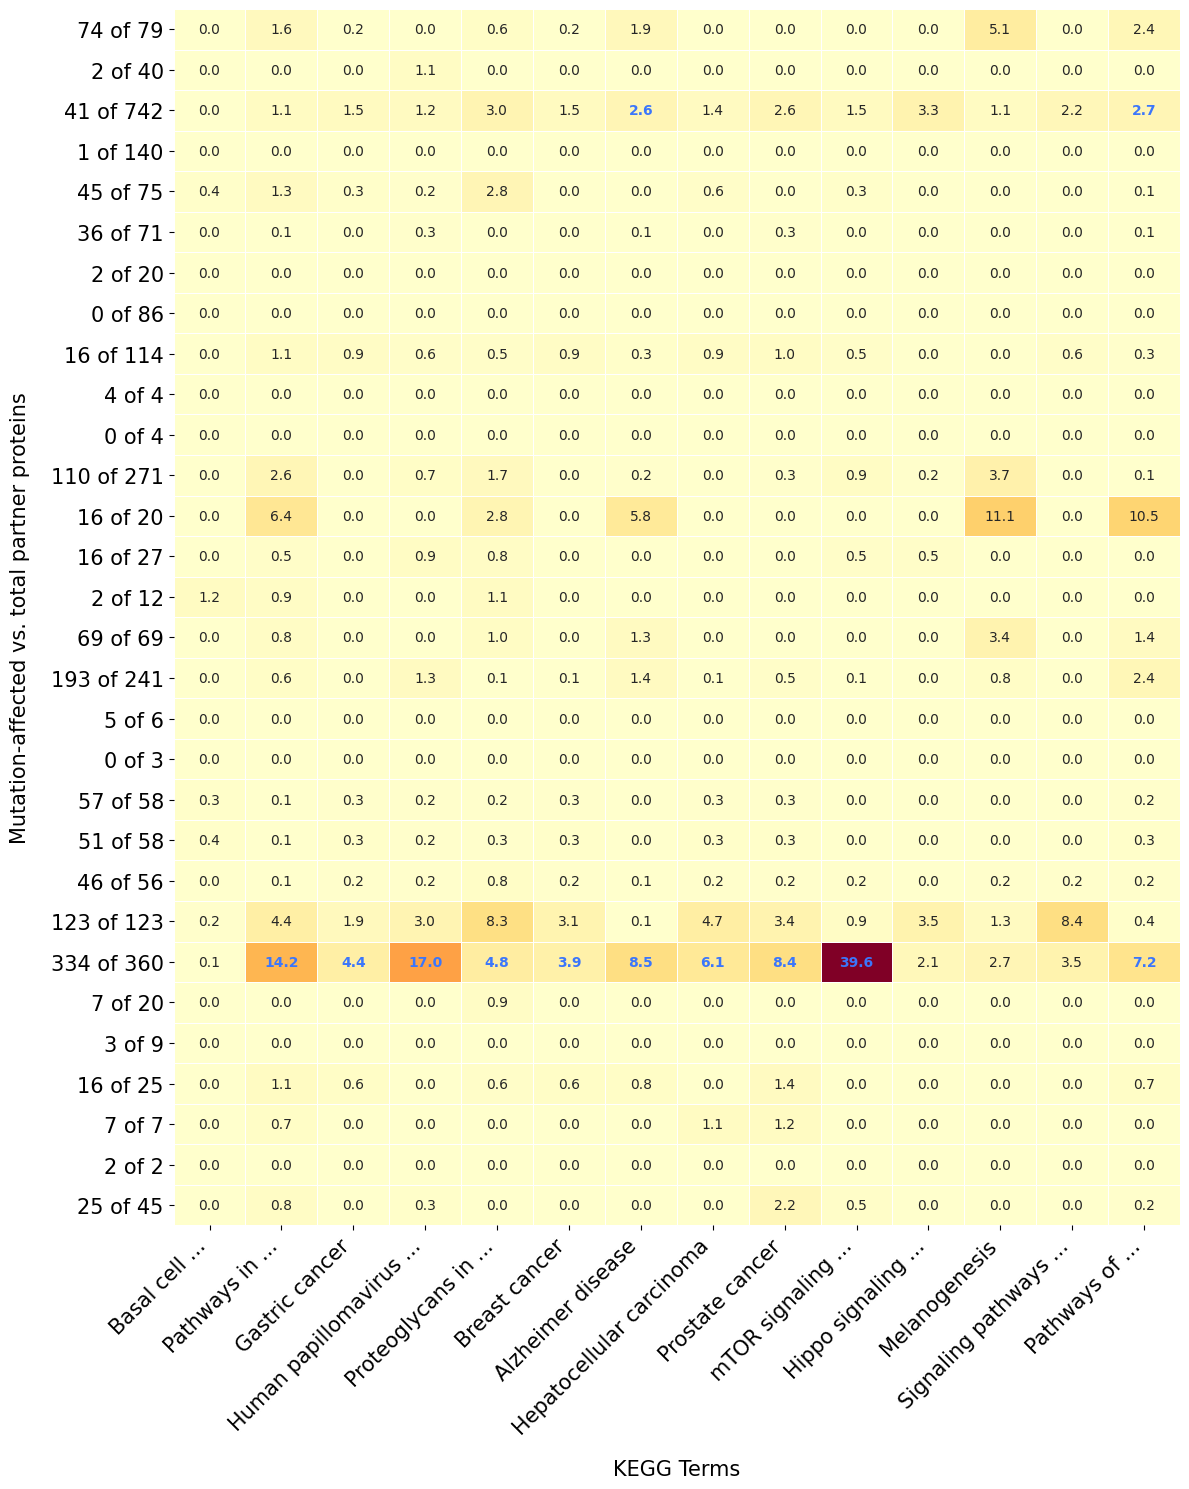

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def truncate_label(label, max_words=2):
    words = label.split()
    if len(words) > max_words:
        return ' '.join(words[:max_words]) + ' ...'
    return label

# 假设 result 是原始数据（行=样本，列=GO/KEGG Terms）
start = 0
data = np.array(result[start:])  # 转置数据（行=Terms，列=样本）

# --- 自适应高度计算 ---
# 基础高度（每个Term分配0.3英寸，最小6英寸）
base_height = 6  
term_height = 0.3  # 每个Term的高度（英寸）
dynamic_height = base_height + term_height * data.shape[0]  # 根据行数调整
fontsize = 15
# 创建画布（宽度固定，高度动态）
plt.figure(figsize=(12, dynamic_height))

# 绘制热图（使用黄到红的经典热图颜色）
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap='YlOrRd',  # 使用黄到红的经典热图颜色
    cbar=False, 
    yticklabels=[f"{number[i]} of {numberb[i]}" for i in range(len(result[start:]))], #Patient {i+1}: 
    xticklabels=important_GO[start:],  # 直接使用GO/KEGG名称列表
    linewidths=0.5  # 添加细线分隔单元格
)

# 调整标签样式
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    ha='right',
    fontsize=fontsize
)
ax.set_yticklabels(
    ax.get_yticklabels(), 
    fontsize=fontsize,
    rotation=0  # 保证纵轴标签水平显示
)

# 设置轴标签
plt.xlabel("KEGG Terms", labelpad=fontsize, fontsize=fontsize)
plt.ylabel("Mutation-affected vs. total partner proteins", labelpad=fontsize, fontsize=fontsize)

# 高亮特定单元格（根据buer矩阵）
for text in ax.texts:
    row, col = map(int, text.get_position())
    if buer[start:][col][row] == 1:  # 注意转置后行列索引变化
        text.set_color('#3b76fb')
        text.set_weight('bold')

plt.savefig('../manything/EE_hotplot.png', dpi=500, bbox_inches='tight')
# 自动调整布局
plt.tight_layout()
plt.show()

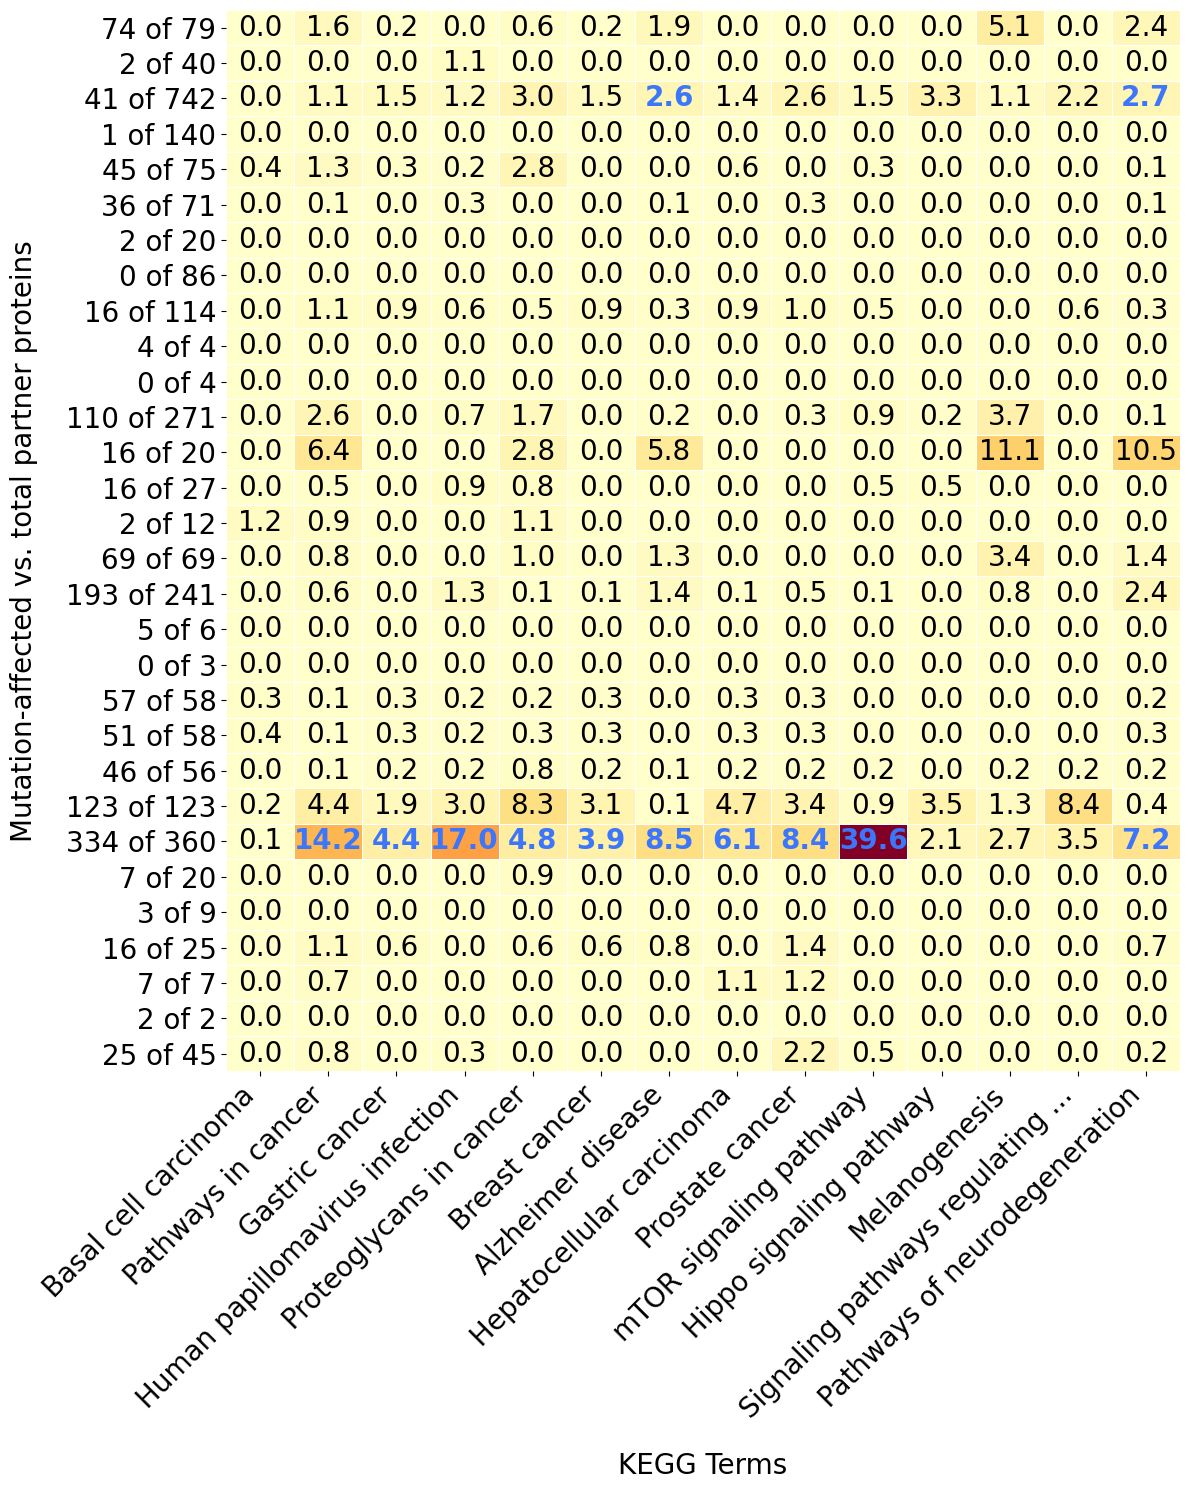

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume result is your data matrix (rows=samples, cols=GO/KEGG Terms)
start = 0
data = np.array(result[start:])  # Transposed data (rows=Terms, cols=samples)

def truncate_label(label, max_words=3):
    words = label.split()
    if len(words) > max_words:
        return ' '.join(words[:max_words]) + ' ...'
    return label


# --- Dynamic height calculation ---
base_height = 6  
term_height = 0.3  
dynamic_height = base_height + term_height * data.shape[0]  
fontsize = 20  # Unified font size for all elements

# Create figure with dynamic height
plt.figure(figsize=(12, dynamic_height))

# Draw heatmap with font control
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap='YlOrRd',
    cbar=False,
    annot_kws={"size": fontsize, "color": "black"},  # Control annotation font
    yticklabels=[f"{number[i]} of {numberb[i]}" for i in range(len(result[start:]))],
    xticklabels=[truncate_label(label) for label in important_GO[start:]],
    linewidths=0.5
)

# Adjust axis labels
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    ha='right',
    fontsize=fontsize  # X-tick labels
)
ax.set_yticklabels(
    ax.get_yticklabels(), 
    fontsize=fontsize,  # Y-tick labels
    rotation=0
)

# Set axis titles
ax.set_xlabel(
    "KEGG Terms", 
    labelpad=fontsize, 
    fontsize=fontsize  # X-axis title
)
ax.set_ylabel(
    "Mutation-affected vs. total partner proteins", 
    labelpad=fontsize, 
    fontsize=fontsize  # Y-axis title
)

# Highlight specific cells
for text in ax.texts:
    row, col = map(int, text.get_position())
    if buer[start:][col][row] == 1:
        text.set_color('#3b76fb')
        text.set_weight('bold')
        text.set_size(fontsize)  # Ensure highlighted text matches size

# Add colorbar with matching font
cbar = ax.figure.colorbar(ax.collections[0])
cbar.ax.tick_params(labelsize=fontsize)  # Colorbar tick labels

ax.collections[0].colorbar.remove() 

plt.savefig('../manything/EE_hotplot.png', dpi=500, bbox_inches='tight')
plt.tight_layout()
plt.show()

2025-04-28 02:45:33,823 [ERROR] No hits returned for all input gene sets!


11


2025-04-28 02:45:35,291 [ERROR] No hits returned for all input gene sets!


19
FGFR2 Pathways in cancer 25
FGFR2 Gastric cancer 25
FGFR2 Prostate cancer 25
FGFR2 Signaling pathways regulating pluripotency of stem cells 25


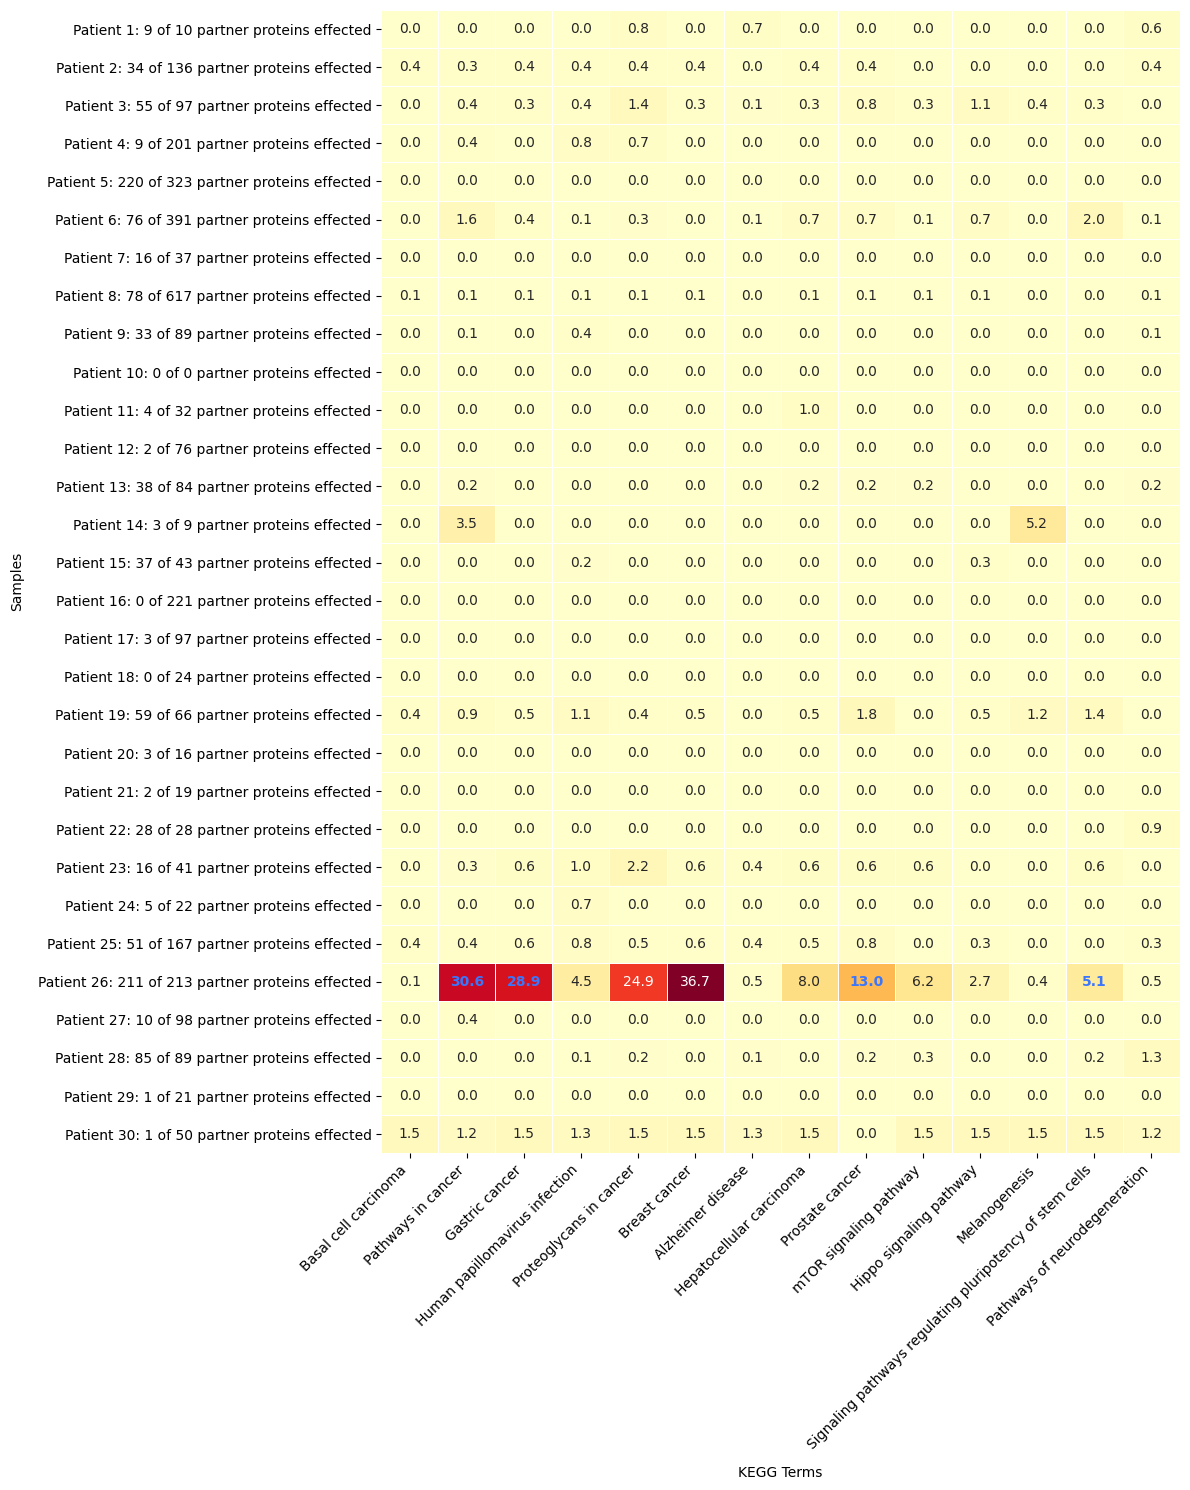

In [14]:
import gseapy as gp
import math
gene_sets = {}
import pandas as pd
# samples = pd.read_csv('../manything/ASD_use.csv')
# samples = samples[samples['PrimaryPhenotype'] == 'Autism (ASD)']
# samples['PrimaryPhenotype'].value_counts(), samples.shape
with open("../manything/KEGG_2021_Human.txt", 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        pathway = parts[0]
        genes = [g for g in parts[2:] if g]  # Skip empty strings
        gene_sets[pathway] = genes

# Perform enrichment analysis

# important_GO = [
#     "Amino acid metabolism",
#     "Neuroactive ligand-receptor interaction",
#     "Cytokine-cytokine receptor interaction",
#     "Calcium signaling pathway",
#     "Synaptic vesicle cycle"
# ]
ssss = {}
for key in gene_sets.keys():
    ssss[key] = []
result = []
number = []
numberb = []

ssss = {}
for key in gene_sets.keys():
    ssss[key] = []
buer = []

nnnn = 30
import json
with open('../manything/disease_onlyp_Control2.json', 'r') as f:
    CDH_list = json.load(f)

# for index, sample in enumerate(CDH_list):
#     use_gene = list(G.neighbors(sample['mutation']))
#     # if any(item not in sample['nab'][0]+sample['nab'][1]+sample['nab'][2]+sample['nab'][3] for item in use_gene):
#     #     print('err0')
#     #     break

#     for class_index in range(len(sample['nab'])):
#         CDH_list[index]['nab'][class_index] = [gene for gene in CDH_list[index]['nab'][class_index] if gene in use_gene]

for idx, sample in enumerate(CDH_list):
    if len(buer) == nnnn + 1:
        break
    sample_result = []
    samplep = sample['nab']
    use_gene = samplep[0] + samplep[1] + samplep[3]# + [samples.iloc[idx]['Gene.refGene']]
    # print(len(use_gene))
    geneuse = sample['mutation']
    number.append(len(use_gene))
    numberb.append(len(samplep[0] + samplep[1] + samplep[2] + samplep[3]))
    if len(use_gene) == 0:
        result.append([0 for _ in range(len(important_GO))])

        sample_buer = []
        # print(len(use_gene))
        for GO in important_GO:
            
            if geneuse in gene_sets[GO]:  # 检查是否找到匹配项
                sample_buer.append(1)
                print(geneuse, GO, idx)
            else:
                sample_buer.append(0)  # 未找到，填充 0
        buer.append(sample_buer)
        
        continue
    enr = gp.enrichr(gene_list=use_gene, # or "./tests/data/gene_list.txt",
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
    pandas_use = enr.results
    if len(pandas_use) == 0:
        print(idx)
        result.append([0 for _ in range(len(important_GO))])
        sample_buer = []
        for GO in important_GO:
            
            if geneuse in gene_sets[GO]:  # 检查是否找到匹配项
                sample_buer.append(1)
                print(geneuse, GO, idx)
            else:
                sample_buer.append(0)  # 未找到，填充 0
        buer.append(sample_buer)



        
        continue
    for GO in important_GO:
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            
            sample_result.append(-math.log10(p_value))

            # p_value = item['Overlap'].values[0]  # 提取 P-value
            
            # sample_result.append(int(p_value.split('/')[0]))
        else:
            sample_result.append(0)  # 未找到，填充 0
    for GO in gene_sets.keys():
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            ssss[GO].append(-math.log10(p_value))
        else:
            ssss[GO].append(0)  # 未找到，填充 0
    
    # result.append(normalize_to_zero_one(sample_result))
    result.append(sample_result)


    sample_buer = []
    # print(len(use_gene))
    for GO in important_GO:
        
        if geneuse in gene_sets[GO]:  # 检查是否找到匹配项
            sample_buer.append(1)
            print(geneuse, GO, idx)
        else:
            sample_buer.append(0)  # 未找到，填充 0
    buer.append(sample_buer)
    if len(buer) == nnnn:
        break

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 result 是原始数据（行=样本，列=GO/KEGG Terms）
start = 0
data2 = np.array(result[start:])  # 转置数据（行=Terms，列=样本）

# --- 自适应高度计算 ---
# 基础高度（每个Term分配0.3英寸，最小6英寸）
base_height = 6  
term_height = 0.3  # 每个Term的高度（英寸）
dynamic_height = base_height + term_height * data.shape[0]  # 根据行数调整

# 创建画布（宽度固定，高度动态）
plt.figure(figsize=(12, dynamic_height))

# 绘制热图（使用黄到红的经典热图颜色）
ax = sns.heatmap(
    data2,
    annot=True,
    fmt=".1f",
    cmap='YlOrRd',  # 使用黄到红的经典热图颜色
    cbar=False,
    yticklabels=[f"Patient {i+1}: {number[i]} of {numberb[i]} partner proteins effected" for i in range(len(result[start:]))],
    xticklabels=important_GO[start:],  # 直接使用GO/KEGG名称列表
    linewidths=0.5  # 添加细线分隔单元格
)

# 调整标签样式
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    ha='right',
    fontsize=10
)
ax.set_yticklabels(
    ax.get_yticklabels(), 
    fontsize=10,
    rotation=0  # 保证纵轴标签水平显示
)

# 设置轴标签
plt.xlabel("KEGG Terms", labelpad=10)
plt.ylabel("Samples", labelpad=10)

# 高亮特定单元格（根据buer矩阵）
for text in ax.texts:
    row, col = map(int, text.get_position())
    if buer[start:][col][row] == 1:  # 注意转置后行列索引变化
        text.set_color('#3b76fb')
        text.set_weight('bold')

plt.savefig('../manything/Control_hotplot.png', dpi=500, bbox_inches='tight')
# 自动调整布局
plt.tight_layout()
plt.show()

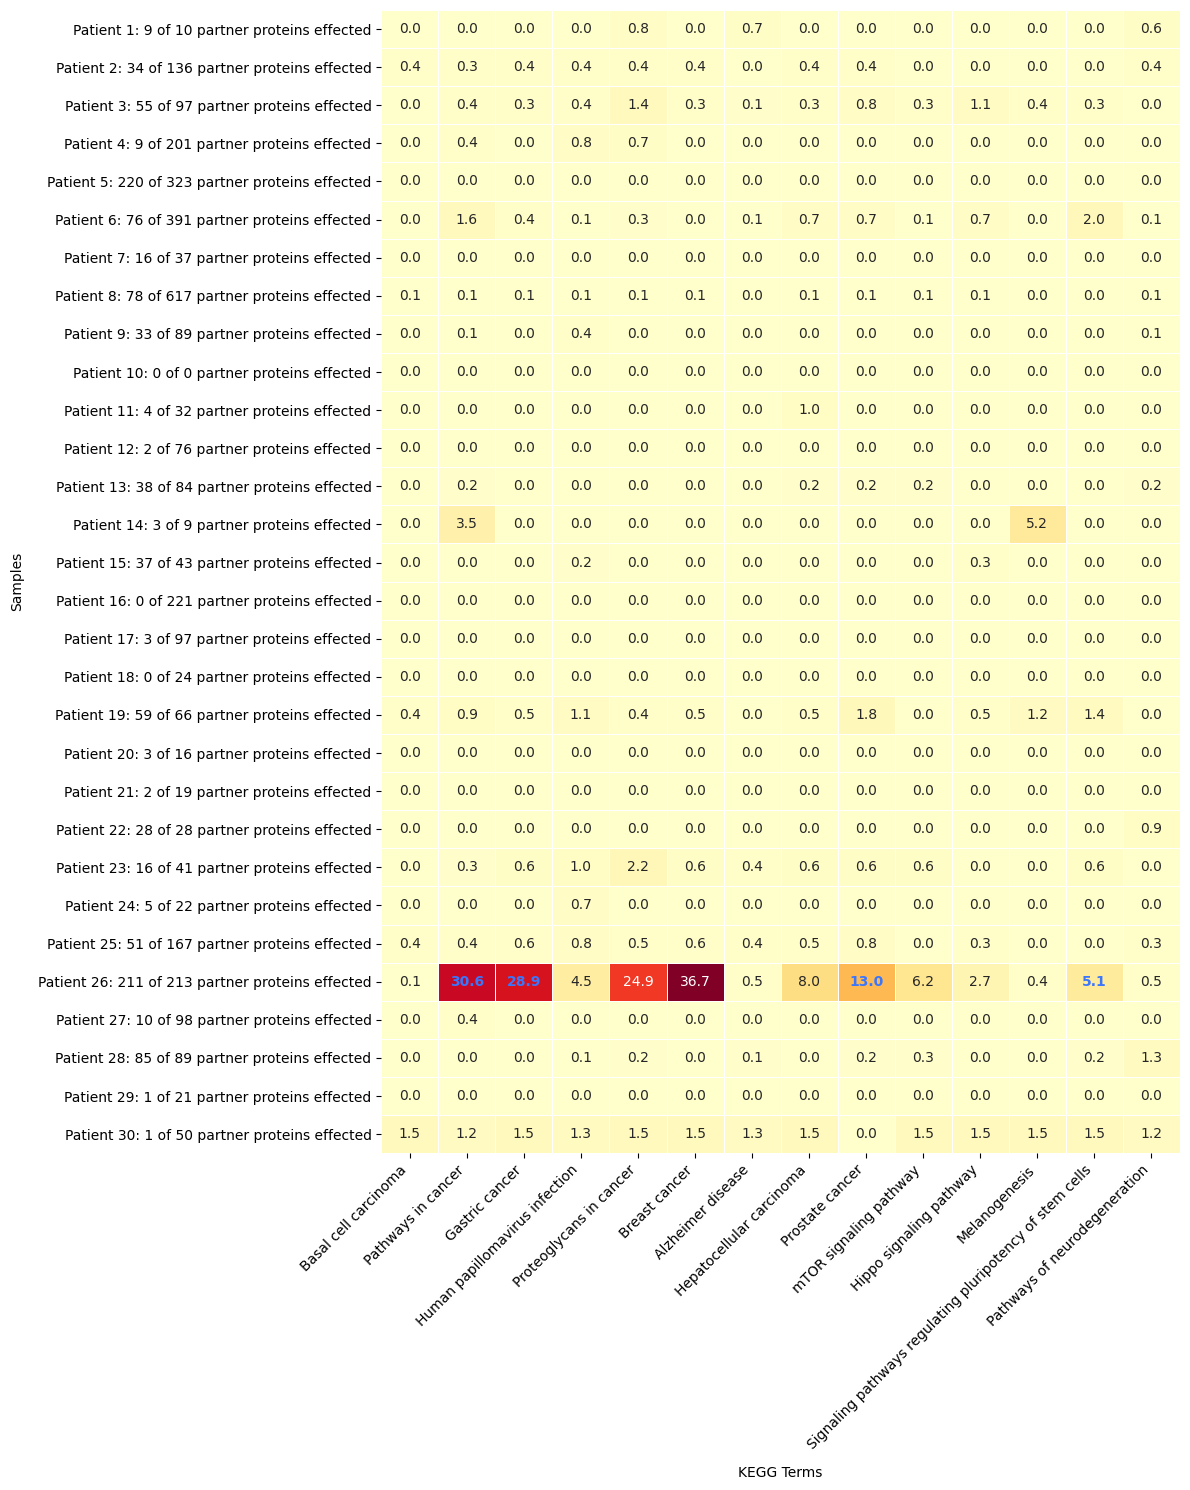

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 result 是原始数据（行=样本，列=GO/KEGG Terms）
start = 0
data2 = np.array(result[start:])  # 转置数据（行=Terms，列=样本）

# --- 自适应高度计算 ---
# 基础高度（每个Term分配0.3英寸，最小6英寸）
base_height = 6  
term_height = 0.3  # 每个Term的高度（英寸）
dynamic_height = base_height + term_height * data.shape[0]  # 根据行数调整

# 创建画布（宽度固定，高度动态）
plt.figure(figsize=(12, dynamic_height))

# 绘制热图（使用黄到红的经典热图颜色）
ax = sns.heatmap(
    data2,
    annot=True,
    fmt=".1f",
    cmap='YlOrRd',  # 使用黄到红的经典热图颜色
    cbar=False,
    yticklabels=[f"Patient {i+1}: {number[i]} of {numberb[i]} partner proteins effected" for i in range(len(result[start:]))],
    xticklabels=important_GO[start:],  # 直接使用GO/KEGG名称列表
    linewidths=0.5  # 添加细线分隔单元格
)

# 调整标签样式
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    ha='right',
    fontsize=10
)
ax.set_yticklabels(
    ax.get_yticklabels(), 
    fontsize=10,
    rotation=0  # 保证纵轴标签水平显示
)

# 设置轴标签
plt.xlabel("KEGG Terms", labelpad=10)
plt.ylabel("Samples", labelpad=10)

# 高亮特定单元格（根据buer矩阵）
for text in ax.texts:
    row, col = map(int, text.get_position())
    if buer[start:][col][row] == 1:  # 注意转置后行列索引变化
        text.set_color('#3b76fb')
        text.set_weight('bold')

plt.savefig('../manything/Control_EE_hotplot.png', dpi=500, bbox_inches='tight')
# 自动调整布局
plt.tight_layout()
plt.show()

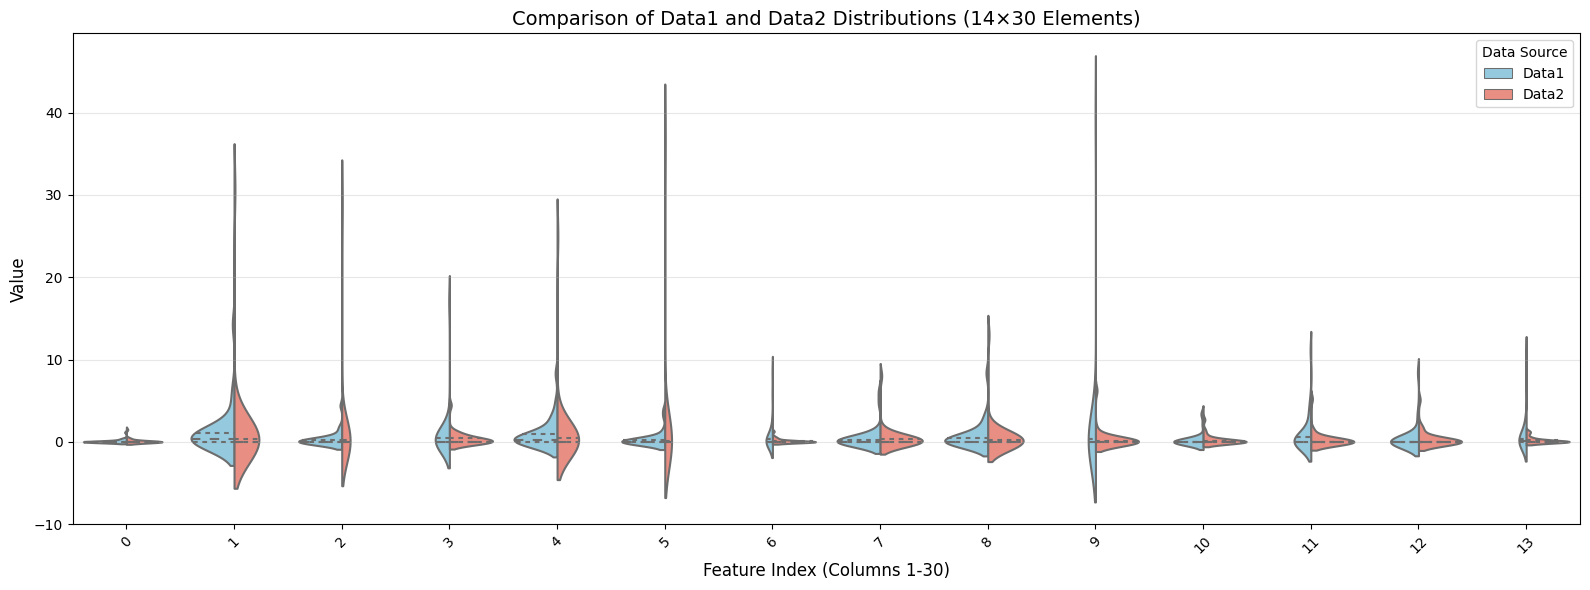

In [18]:
df1 = pd.DataFrame(data).melt(var_name='Feature', value_name='Value')
df1['Source'] = 'Data1'  # 添加来源标签

df2 = pd.DataFrame(data2).melt(var_name='Feature', value_name='Value')
df2['Source'] = 'Data2'  # 添加来源标签

combined_df = pd.concat([df1, df2])  # 合并为一个DataFrame

# 绘制对比小提琴图
plt.figure(figsize=(16, 6))
sns.violinplot(
    data=combined_df,
    x='Feature',
    y='Value',
    hue='Source',  # 按来源分组
    split=True,    # 左右并排显示
    palette={'Data1': 'skyblue', 'Data2': 'salmon'},  # 自定义颜色
    inner='quartile'  # 显示四分位线
)

# 美化图形
plt.title('Comparison of Data1 and Data2 Distributions (14×30 Elements)', fontsize=14)
plt.xlabel('Feature Index (Columns 1-30)', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Data Source')
plt.tight_layout()
plt.show()

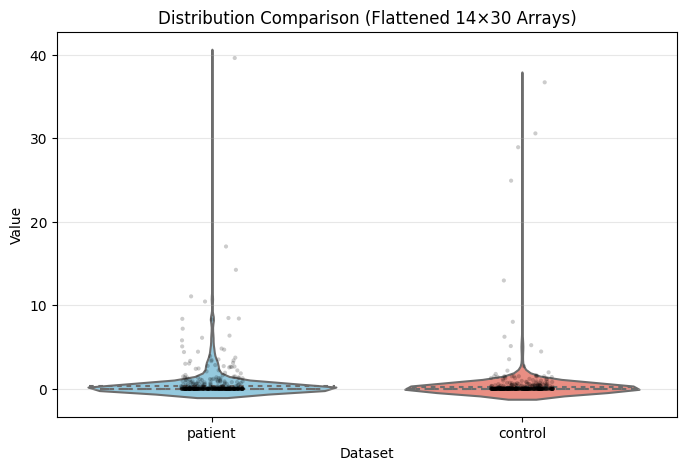

In [22]:
flat_data = data.flatten()    # 420个元素
flat_data2 = data2.flatten()  # 420个元素

# 合并为DataFrame
import pandas as pd
df = pd.DataFrame({
    'Value': np.concatenate([flat_data, flat_data2]),
    'Dataset': ['patient'] * len(flat_data) + ['control'] * len(flat_data2)
})

# 绘制对比小提琴图
plt.figure(figsize=(8, 5))
sns.violinplot(
    data=df,
    x='Dataset',
    y='Value',
    palette={'patient': 'skyblue', 'control': 'salmon'},
    inner='quartile',  # 显示四分位数线
    bw=0.2            # 控制平滑度
)

# 添加统计标记
sns.stripplot(
    data=df,
    x='Dataset',
    y='Value',
    color='black',
    alpha=0.2,
    jitter=True,
    size=3
)

plt.title('Distribution Comparison (Flattened 14×30 Arrays)')
plt.ylabel('Value')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [13]:
set(use[0])&set(gene_sets[important_GO[GO_index]]), set(use[1]) & set(gene_sets[important_GO[GO_index]]), set(use[2]) & set(gene_sets[important_GO[GO_index]]), set(use[3]) & set(gene_sets[important_GO[GO_index]])

({'AKT1',
  'AKT1S1',
  'ATP6V1A',
  'ATP6V1B1',
  'ATP6V1B2',
  'ATP6V1C1',
  'ATP6V1C2',
  'ATP6V1D',
  'ATP6V1E1',
  'ATP6V1E2',
  'ATP6V1F',
  'ATP6V1G1',
  'ATP6V1G2',
  'ATP6V1H',
  'CHUK',
  'CLIP1',
  'DDIT4',
  'DEPTOR',
  'EIF4EBP1',
  'HRAS',
  'IGF1R',
  'IRS1',
  'KRAS',
  'LAMTOR2',
  'LAMTOR4',
  'MAPKAP1',
  'MLST8',
  'NRAS',
  'PDPK1',
  'PIK3CA',
  'PRKCA',
  'PRR5',
  'RHEB',
  'RICTOR',
  'RPS6',
  'RPS6KB1',
  'RPS6KB2',
  'RPTOR',
  'RRAGA',
  'RRAGB',
  'RRAGC',
  'RRAGD',
  'SESN2',
  'SLC38A9',
  'TTI1',
  'ULK1'},
 {'ATP6V1G3', 'EIF4E', 'IKBKB', 'LAMTOR1', 'SGK1', 'SKP2', 'TELO2'},
 {'LAMTOR3', 'LAMTOR5'},
 set())

In [11]:
sample_index = 23
GO_index = -5
use = CDH_list[sample_index]['nab']
effected = use[0]+use[1]+use[3]
print(set(use[0])&set(gene_sets[important_GO[GO_index]]), set(use[1]) & set(gene_sets[important_GO[GO_index]]), set(use[3]) & set(gene_sets[important_GO[GO_index]]))
for iiia in set(effected) & set(gene_sets[important_GO[GO_index]]):
    print(iiia)
print(CDH_list[sample_index]['mutation'])
set(effected) & set(gene_sets[important_GO[GO_index]]), CDH_list[sample_index]['mutation'], important_GO[GO_index]

{'SESN2', 'LAMTOR2', 'HRAS', 'RRAGA', 'PIK3CA', 'CHUK', 'RRAGB', 'ATP6V1D', 'ATP6V1G2', 'KRAS', 'ATP6V1C2', 'ATP6V1B1', 'ATP6V1E1', 'MAPKAP1', 'TTI1', 'RRAGC', 'ATP6V1H', 'EIF4EBP1', 'RICTOR', 'SLC38A9', 'ATP6V1E2', 'CLIP1', 'IGF1R', 'DEPTOR', 'LAMTOR4', 'IRS1', 'DDIT4', 'ATP6V1G1', 'NRAS', 'RRAGD', 'MLST8', 'AKT1', 'ULK1', 'RPS6KB1', 'ATP6V1A', 'ATP6V1C1', 'PRKCA', 'ATP6V1F', 'RPS6', 'PDPK1', 'RHEB', 'ATP6V1B2', 'RPS6KB2', 'AKT1S1', 'RPTOR', 'PRR5'} {'IKBKB', 'TELO2', 'SGK1', 'SKP2', 'LAMTOR1', 'ATP6V1G3', 'EIF4E'} set()
SESN2
LAMTOR2
HRAS
RRAGA
PIK3CA
CHUK
RRAGB
ATP6V1D
ATP6V1G2
ATP6V1G3
KRAS
ATP6V1C2
ATP6V1B1
ATP6V1E1
IKBKB
MAPKAP1
TTI1
TELO2
RRAGC
ATP6V1H
EIF4EBP1
RICTOR
SLC38A9
ATP6V1E2
CLIP1
IGF1R
DEPTOR
LAMTOR4
IRS1
DDIT4
ATP6V1G1
NRAS
SGK1
RRAGD
MLST8
LAMTOR1
AKT1
ULK1
RPS6KB1
ATP6V1A
ATP6V1C1
PRKCA
ATP6V1F
RPS6
PDPK1
SKP2
RHEB
ATP6V1B2
RPS6KB2
AKT1S1
RPTOR
EIF4E
PRR5
MTOR


({'AKT1',
  'AKT1S1',
  'ATP6V1A',
  'ATP6V1B1',
  'ATP6V1B2',
  'ATP6V1C1',
  'ATP6V1C2',
  'ATP6V1D',
  'ATP6V1E1',
  'ATP6V1E2',
  'ATP6V1F',
  'ATP6V1G1',
  'ATP6V1G2',
  'ATP6V1G3',
  'ATP6V1H',
  'CHUK',
  'CLIP1',
  'DDIT4',
  'DEPTOR',
  'EIF4E',
  'EIF4EBP1',
  'HRAS',
  'IGF1R',
  'IKBKB',
  'IRS1',
  'KRAS',
  'LAMTOR1',
  'LAMTOR2',
  'LAMTOR4',
  'MAPKAP1',
  'MLST8',
  'NRAS',
  'PDPK1',
  'PIK3CA',
  'PRKCA',
  'PRR5',
  'RHEB',
  'RICTOR',
  'RPS6',
  'RPS6KB1',
  'RPS6KB2',
  'RPTOR',
  'RRAGA',
  'RRAGB',
  'RRAGC',
  'RRAGD',
  'SESN2',
  'SGK1',
  'SKP2',
  'SLC38A9',
  'TELO2',
  'TTI1',
  'ULK1'},
 'MTOR',
 'mTOR signaling pathway')

In [37]:
sample_index = 5
GO_index = 6
use = CDH_list[sample_index]['nab']
effected = use[0]+use[1]+use[3]
print(set(use[0])&set(gene_sets[important_GO[GO_index]]), set(use[1]) & set(gene_sets[important_GO[GO_index]]), set(use[3]) & set(gene_sets[important_GO[GO_index]]))
for iiia in set(effected) & set(gene_sets[important_GO[GO_index]]):
    print(iiia)
print(CDH_list[sample_index]['mutation'])
set(effected) & set(gene_sets[important_GO[GO_index]]), CDH_list[sample_index]['mutation'], important_GO[GO_index]

set() {'SNCA'} set()
SNCA
ARSA


({'SNCA'}, 'ARSA', 'Alzheimer disease')

In [6]:
import gseapy as gp
import math
gene_sets = {}
with open("../manything/KEGG_2021_Human.txt", 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        pathway = parts[0]
        genes = [g for g in parts[2:] if g]  # Skip empty strings
        gene_sets[pathway] = genes

# Perform enrichment analysis

important_GO = [
    "Amino acid metabolism",
    "Neuroactive ligand-receptor interaction",
    "Cytokine-cytokine receptor interaction",
    "Calcium signaling pathway",
    "Synaptic vesicle cycle"
]
ssss = {}
for key in gene_sets.keys():
    ssss[key] = []
result = []
number = []
for use_gene in importants:
    sample_result = []
    # use_gene = sample[0] + sample[1] + sample[3]
    # print(len(use_gene))
    number.append(len(use_gene))
    enr = gp.enrichr(gene_list=use_gene, # or "./tests/data/gene_list.txt",
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
    pandas_use = enr.results
    for GO in important_GO:
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            sample_result.append(-math.log10(p_value))
        else:
            sample_result.append(0)  # 未找到，填充 0
    for GO in gene_sets.keys():
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            ssss[GO].append(-math.log10(p_value))
        else:
            ssss[GO].append(0)  # 未找到，填充 0
    
    # result.append(normalize_to_zero_one(sample_result))
    result.append(sample_result)
    # if len(result) == 30:
    #     break
# Calculate the average for each GO term in ssss
average_scores = {go: (sum(scores) / len(scores) if scores else 0) for go, scores in ssss.items()}

# Find the top 5 GO terms with the highest average scores
top_5_go = sorted(average_scores.items(), key=lambda item: item[1], reverse=True)[:20]

# Print the results
important_GO = []
for go_term, avg_score in top_5_go:
    print("GO term:", go_term, "Average score:", avg_score)
    important_GO.append(go_term)

GO term: Basal cell carcinoma Average score: 3.7392503719599395
GO term: Pathways in cancer Average score: 3.343127591907557
GO term: Gastric cancer Average score: 3.140869507704721
GO term: Human papillomavirus infection Average score: 2.868895626141204
GO term: Proteoglycans in cancer Average score: 2.7945503457658374
GO term: Breast cancer Average score: 2.7767561886719925
GO term: Alzheimer disease Average score: 2.753007511671749
GO term: Hepatocellular carcinoma Average score: 2.692843354323061
GO term: Prostate cancer Average score: 2.5252828423509017
GO term: mTOR signaling pathway Average score: 2.252645901409376
GO term: Hippo signaling pathway Average score: 2.149651248501914
GO term: Melanogenesis Average score: 2.1389775224392
GO term: Signaling pathways regulating pluripotency of stem cells Average score: 2.1262143137584415
GO term: Pathways of neurodegeneration Average score: 2.0824330657839005
GO term: Cushing syndrome Average score: 1.9821709265357736
GO term: Salmonel

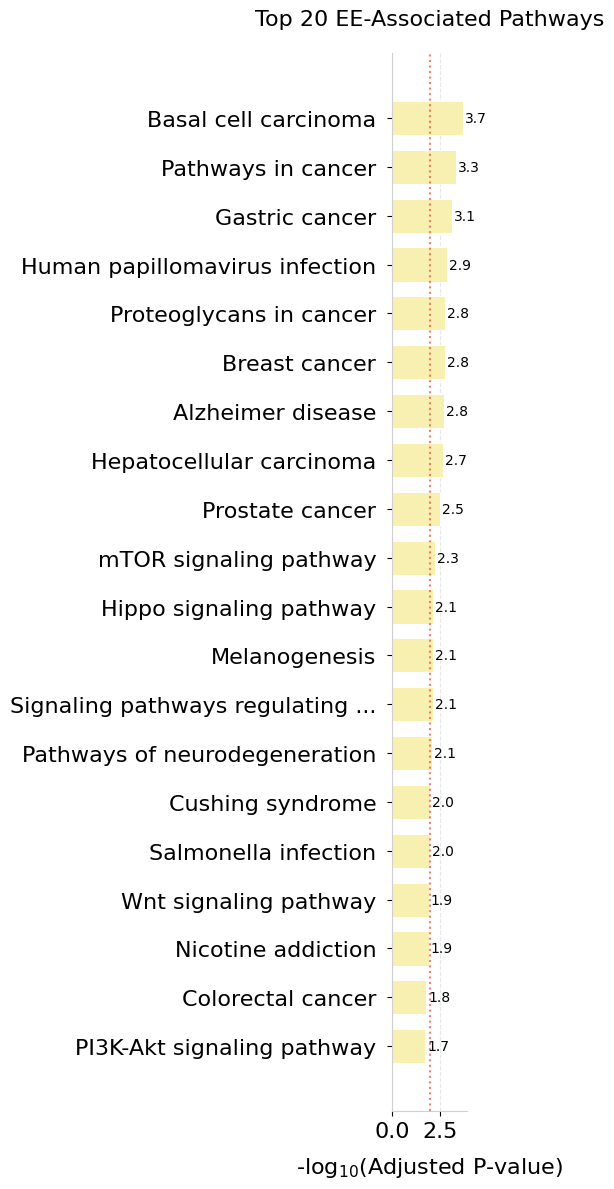

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_hot = sorted(average_scores.items(), key=lambda item: item[1], reverse=True)[:20]
labels, values = zip(*data_hot)
plt.figure(figsize=(5, 12))
ax = plt.gca()
def truncate_label(label, max_words=3):
    words = label.split()
    if len(words) > max_words:
        return ' '.join(words[:max_words]) + ' ...'
    return label
# Custom colors
frontsize = 16
main_color = '#F8F0B0'  # Your requested navy blue
highlight_color = '#4c8cbd'  # Lighter complementary blue

# Create horizontal bars with improved formatting
bars = ax.barh([truncate_label(e) for e in labels], values, 
               color=main_color,
               height=0.7,  # Slightly thicker bars
               edgecolor='white',
               linewidth=0.7)

# Add value labels at the end of each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1,  # x-position (right of bar)
            bar.get_y() + bar.get_height()/2,  # y-position (center of bar)
            f'{width:.1f}',  # Formatted value
            va='center',
            ha='left',
            fontsize=10)

# Styling improvements
ax.set_xlabel('-log$_{10}$(Adjusted P-value)', 
              fontsize = frontsize, labelpad=10)
ax.set_title('Top 20 EE-Associated Pathways', 
             fontsize = frontsize, pad=20)

# Adjust spines (borders) for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d0d0d0')
ax.spines['bottom'].set_color('#d0d0d0')

# Grid and tick formatting
ax.xaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)  # Grid behind bars

# Improved y-axis labels (choose either OPTION 1 or 2 below)

# OPTION 1: Larger font + black (recommended)
ax.tick_params(axis='y', which='major', 
               labelsize=frontsize,  # Increased from default 10
               colors='black',  # Pure black
               pad=8)

# OPTION 2: Bold font + black (alternative)
# ax.tick_params(axis='y', which='major',
#                colors='black',
#                labelsize=11,
#                pad=8)
# for label in ax.get_yticklabels():
#     label.set_fontweight('bold')

ax.tick_params(axis='x', labelsize=frontsize)  # Keep x-axis ticks gray

# Add threshold line
threshold = 2
ax.axvline(x=threshold, color='#e74c3c', linestyle=':', alpha=0.7, linewidth=1.5)

# Invert y-axis to show highest value at top
ax.invert_yaxis()

plt.savefig('../manything/EE_pvalue.png', dpi=500, bbox_inches='tight')
plt.tight_layout()
plt.show()

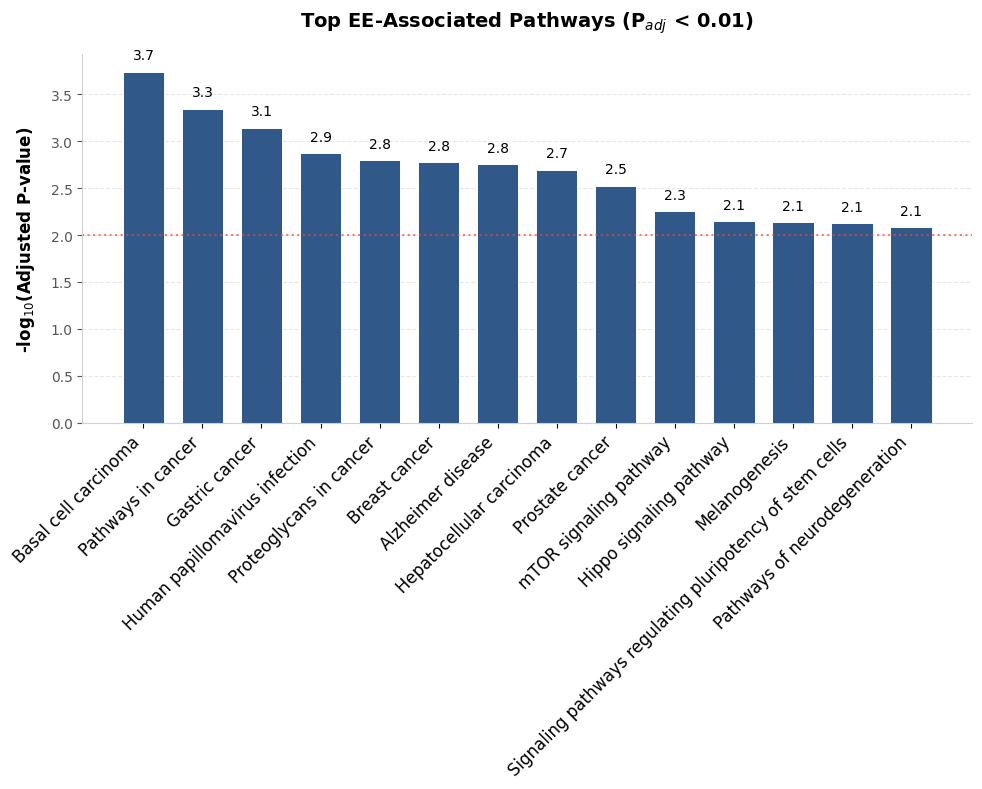

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设这是你的数据准备部分
data_hot = sorted(average_scores.items(), key=lambda item: item[1], reverse=True)[:14]
labels, values = zip(*data_hot)

plt.figure(figsize=(10, 8))  # 调整图形尺寸以适应垂直布局
ax = plt.gca()

# 自定义颜色
main_color = '#305989'  # 海军蓝
highlight_color = '#4c8cbd'  # 浅蓝色

# 创建垂直条形图（关键修改：bar → barh）
bars = ax.bar(labels, values, 
              color=main_color,
              width=0.7,  # 条形的宽度（相当于水平图的height）
              edgecolor='white',
              linewidth=0.7)

# 调整值标签位置（改为在条形顶部显示）
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,  # x位置（条形中心）
            height + 0.1,  # y位置（略高于条形顶部）
            f'{height:.1f}',  # 格式化值
            va='bottom',  # 垂直对齐
            ha='center',  # 水平对齐
            fontsize=10)

# 样式调整
ax.set_ylabel('-log$_{10}$(Adjusted P-value)',  # 改为y轴标签
             fontsize=12, labelpad=10, fontweight='bold')
ax.set_title('Top EE-Associated Pathways (P$_{adj}$ < 0.01)', 
             fontsize=14, pad=20, fontweight='bold')

# 调整边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d0d0d0')
ax.spines['bottom'].set_color('#d0d0d0')

# 网格线（改为水平网格）
ax.yaxis.grid(True, linestyle='--', alpha=0.3)
ax.set_axisbelow(True)

# 刻度标签调整（x轴标签可能需要旋转）
plt.xticks(rotation=45, ha='right', fontsize=12)  # 旋转x轴标签
ax.tick_params(axis='y', colors='#555555')

# 阈值线（改为水平线）
threshold = 2
ax.axhline(y=threshold, color='#e74c3c', linestyle=':', alpha=0.7, linewidth=1.5)

# 不需要反转y轴（垂直图默认高值在上）

plt.tight_layout()  # 自动调整布局
plt.savefig('../manything/EE_pvalue_vertical.png', dpi=500, bbox_inches='tight')
plt.show()

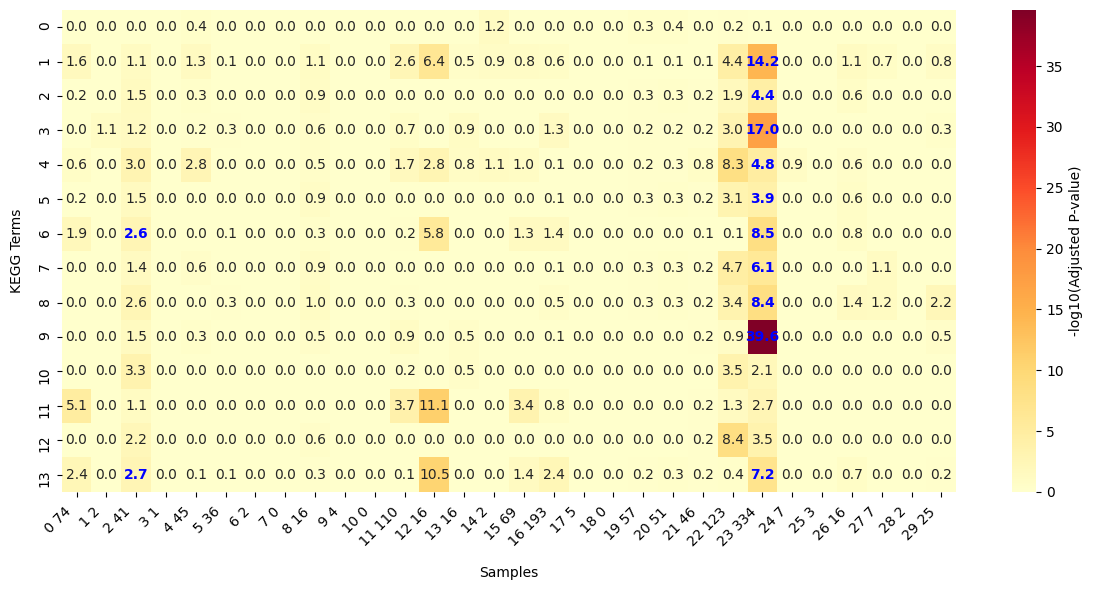

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 转换为 numpy 数组
start = 0
data = np.array(result[start:]).T  # 或 data = np.transpose(result)

# 绘制热图
plt.figure(figsize=(12, 6))  # 适当增加高度以适应旋转的标签

# 绘制热图
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    xticklabels=[f" {i} {str(number[i])} " for i in range(len(result[start:]))],
    yticklabels=[f"{j}" for j in range(len(important_GO))],
    cbar_kws={"label": "-log10(Adjusted P-value)"}  # 修改颜色条标签
)

# 旋转横轴标签45度，并右对齐
ax.set_xticklabels(ax.get_xticklabels(), 
                  rotation=45, 
                  ha='right',
                  fontsize=10)

# 调整纵轴标签字体
ax.set_yticklabels(ax.get_yticklabels(), 
                  fontsize=10)

# 添加标题和轴标签
# plt.title("Transposed Heatmap (8x12)", pad=20)
plt.xlabel("Samples", labelpad=10)
plt.ylabel("KEGG Terms", labelpad=10)

for text in ax.texts:
    # 获取当前文本的位置（行和列）
    row, col = text.get_position()
    # if int(row) == 2 and int(col) == 3:  # 第3行第4列（索引从0开始）
    if buer[start:][int(row)][int(col)] == 1:
        text.set_color('blue')  # 修改颜色
        text.set_weight('bold')  # 可选：加粗
# 确保标签不被截断
plt.tight_layout()

plt.show()

In [10]:
sample_index = 28
GO_index = 2
use = CDH_list[sample_index]['nab']
effected = use[0]+use[1]+use[3]
print(set(use[0])&set(gene_sets[important_GO[GO_index]]), set(use[1]) & set(gene_sets[important_GO[GO_index]]), set(use[3]) & set(gene_sets[important_GO[GO_index]]))
for iiia in set(effected) & set(gene_sets[important_GO[GO_index]]):
    print(iiia)
print(CDH_list[sample_index]['mutation'])
set(effected) & set(gene_sets[important_GO[GO_index]]), CDH_list[sample_index]['mutation'], important_GO[GO_index]

{'PRKCA', 'JAG1'} {'SRC'} set()
PRKCA
SRC
JAG1
SDCBP2


({'JAG1', 'PRKCA', 'SRC'}, 'SDCBP2', 'Chemical carcinogenesis')

In [44]:
sample_index = 28
GO_index = 2
use = CDH_list[sample_index]['nab']
effected = use[0]+use[1]+use[3]
print(set(use[0])&set(gene_sets[important_GO[GO_index]]), set(use[1]) & set(gene_sets[important_GO[GO_index]]), set(use[3]) & set(gene_sets[important_GO[GO_index]]))
for iiia in set(effected) & set(gene_sets[important_GO[GO_index]]):
    print(iiia)
print(CDH_list[sample_index]['mutation'])
set(effected) & set(gene_sets[important_GO[GO_index]]), CDH_list[sample_index]['mutation'], important_GO[GO_index]


{'PRKCA', 'JAG1'} {'SRC'} set()
PRKCA
SRC
JAG1
SDCBP2


({'JAG1', 'PRKCA', 'SRC'}, 'SDCBP2', 'Chemical carcinogenesis')

In [25]:
set(['THBS1' ,'ITGA2B' ,'GP1BA' ,'THBS1' ,'MIR27A']) & set(gene_sets[important_GO[2]])

{'ITGA2B'}

In [ ]:
import gseapy as gp
import math
gene_sets = {}
import pandas as pd
# samples = pd.read_csv('../manything/ASD_use.csv')
# samples = samples[samples['PrimaryPhenotype'] == 'Autism (ASD)']
# samples['PrimaryPhenotype'].value_counts(), samples.shape
with open("../manything/KEGG_2021_Human.txt", 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        pathway = parts[0]
        genes = [g for g in parts[2:] if g]  # Skip empty strings
        gene_sets[pathway] = genes

# Perform enrichment analysis

# important_GO = [
#     "Amino acid metabolism",
#     "Neuroactive ligand-receptor interaction",
#     "Cytokine-cytokine receptor interaction",
#     "Calcium signaling pathway",
#     "Synaptic vesicle cycle"
# ]
ssss = {}
for key in gene_sets.keys():
    ssss[key] = []
result = []
number = []

ssss = {}
for key in gene_sets.keys():
    ssss[key] = []
buer = []

nnnn = 30
import json
with open('../manything/disease_onlyp_LGS.json', 'r') as f:
    CDH_list = json.load(f)

# for index, sample in enumerate(CDH_list):
#     use_gene = list(G.neighbors(sample['mutation']))
#     # if any(item not in sample['nab'][0]+sample['nab'][1]+sample['nab'][2]+sample['nab'][3] for item in use_gene):
#     #     print('err0')
#     #     break

#     for class_index in range(len(sample['nab'])):
#         CDH_list[index]['nab'][class_index] = [gene for gene in CDH_list[index]['nab'][class_index] if gene in use_gene]

for idx, sample in enumerate(CDH_list):
    sample_result = []
    samplep = sample['nab']
    use_gene = samplep[0] + samplep[1] + samplep[3]# + [samples.iloc[idx]['Gene.refGene']]
    # print(len(use_gene))
    geneuse = sample['mutation']
    number.append(len(use_gene))
    if len(use_gene) == 0:
        result.append([0 for _ in range(len(important_GO))])

        sample_buer = []
        # print(len(use_gene))
        for GO in important_GO:
            
            if geneuse in gene_sets[GO]:  # 检查是否找到匹配项
                sample_buer.append(1)
                print(geneuse, GO, idx)
            else:
                sample_buer.append(0)  # 未找到，填充 0
        buer.append(sample_buer)
        
        continue
    enr = gp.enrichr(gene_list=use_gene, # or "./tests/data/gene_list.txt",
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
    pandas_use = enr.results
    if len(pandas_use) == 0:
        print(idx)
        result.append([0 for _ in range(len(important_GO))])
        sample_buer = []
        for GO in important_GO:
            
            if geneuse in gene_sets[GO]:  # 检查是否找到匹配项
                sample_buer.append(1)
                print(geneuse, GO, idx)
            else:
                sample_buer.append(0)  # 未找到，填充 0
        buer.append(sample_buer)



        
        continue
    for GO in important_GO:
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            
            sample_result.append(-math.log10(p_value))

            # p_value = item['Overlap'].values[0]  # 提取 P-value
            
            # sample_result.append(int(p_value.split('/')[0]))
        else:
            sample_result.append(0)  # 未找到，填充 0
    for GO in gene_sets.keys():
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            ssss[GO].append(-math.log10(p_value))
        else:
            ssss[GO].append(0)  # 未找到，填充 0
    
    # result.append(normalize_to_zero_one(sample_result))
    result.append(sample_result)


    sample_buer = []
    # print(len(use_gene))
    for GO in important_GO:
        
        if geneuse in gene_sets[GO]:  # 检查是否找到匹配项
            sample_buer.append(1)
            print(geneuse, GO, idx)
        else:
            sample_buer.append(0)  # 未找到，填充 0
    buer.append(sample_buer)
    if len(buer) == nnnn:
        break

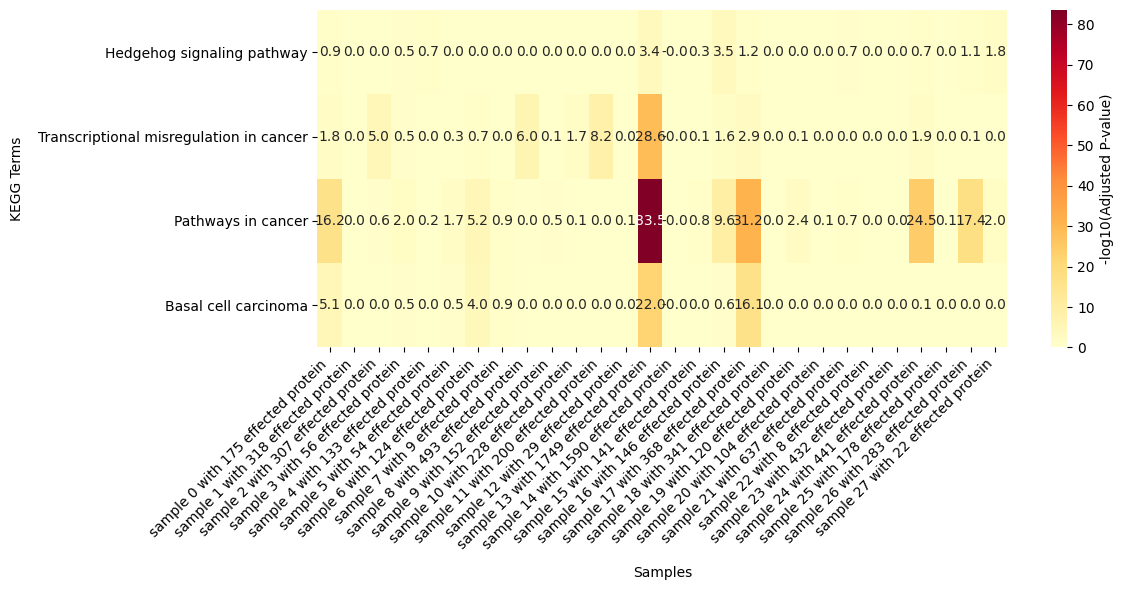

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 转换为 numpy 数组
start = 0
data = np.array(result[start:]).T  # 或 data = np.transpose(result)

# 绘制热图
plt.figure(figsize=(12, 6))  # 适当增加高度以适应旋转的标签

# 绘制热图
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    xticklabels=[f"sample {i} with {str(number[i])} effected protein" for i in range(len(result[start:]))],
    yticklabels=[f"{j}" for j in important_GO],
    cbar_kws={"label": "-log10(Adjusted P-value)"}  # 修改颜色条标签
)

# 旋转横轴标签45度，并右对齐
ax.set_xticklabels(ax.get_xticklabels(), 
                  rotation=45, 
                  ha='right',
                  fontsize=10)

# 调整纵轴标签字体
ax.set_yticklabels(ax.get_yticklabels(), 
                  fontsize=10)

# 添加标题和轴标签
# plt.title("Transposed Heatmap (8x12)", pad=20)
plt.xlabel("Samples", labelpad=10)
plt.ylabel("KEGG Terms", labelpad=10)

for text in ax.texts:
    # 获取当前文本的位置（行和列）
    row, col = text.get_position()
    # if int(row) == 2 and int(col) == 3:  # 第3行第4列（索引从0开始）
    if buer[start:][int(row)][int(col)] == 1:
        text.set_color('blue')  # 修改颜色
        text.set_weight('bold')  # 可选：加粗
# 确保标签不被截断
plt.tight_layout()

plt.show()

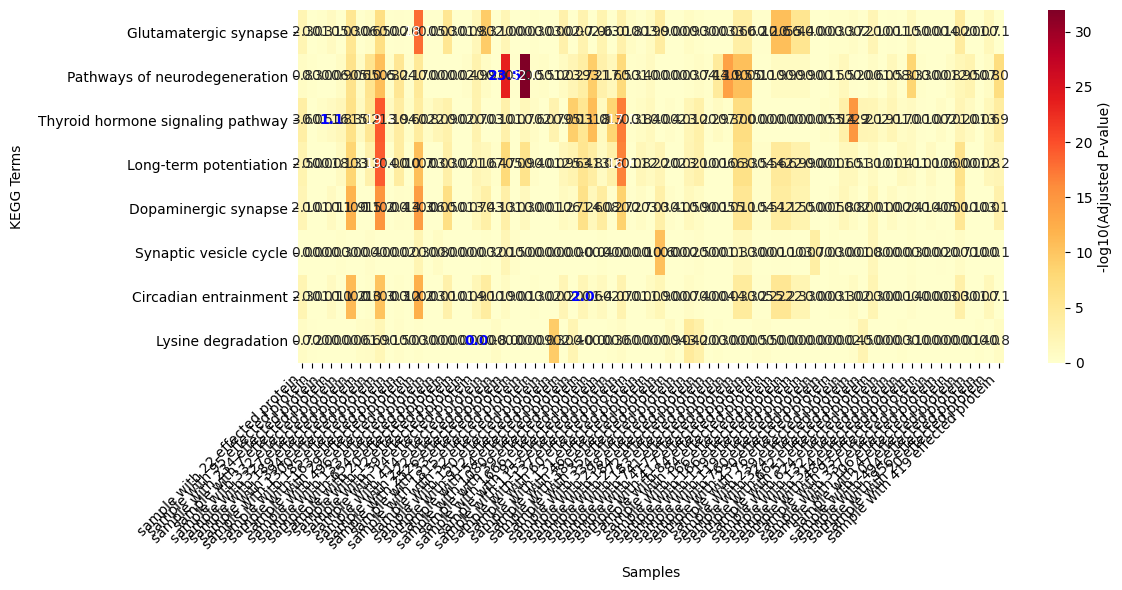

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 转换为 numpy 数组
start = 0
data = np.array(result[start:]).T  # 或 data = np.transpose(result)

# 绘制热图
plt.figure(figsize=(12, 6))  # 适当增加高度以适应旋转的标签

# 绘制热图
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    xticklabels=[f"sample with {str(number[i])} effected protein" for i in range(len(result[start:]))],
    yticklabels=[f"{j}" for j in important_GO],
    cbar_kws={"label": "-log10(Adjusted P-value)"}  # 修改颜色条标签
)

# 旋转横轴标签45度，并右对齐
ax.set_xticklabels(ax.get_xticklabels(), 
                  rotation=45, 
                  ha='right',
                  fontsize=10)

# 调整纵轴标签字体
ax.set_yticklabels(ax.get_yticklabels(), 
                  fontsize=10)

# 添加标题和轴标签
# plt.title("Transposed Heatmap (8x12)", pad=20)
plt.xlabel("Samples", labelpad=10)
plt.ylabel("KEGG Terms", labelpad=10)

for text in ax.texts:
    # 获取当前文本的位置（行和列）
    row, col = text.get_position()
    # if int(row) == 2 and int(col) == 3:  # 第3行第4列（索引从0开始）
    if buer[start:][int(row)][int(col)] == 1:
        text.set_color('blue')  # 修改颜色
        text.set_weight('bold')  # 可选：加粗
# 确保标签不被截断
plt.tight_layout()

plt.show()

In [39]:
sample_index = 29
GO_index = 2
use = ASD_list[sample_index]
effected = use[0]+use[1]+use[3]
print(set(use[0])&set(gene_sets[important_GO[GO_index]]), set(use[1]) & set(gene_sets[important_GO[GO_index]]), set(use[3]) & set(gene_sets[important_GO[GO_index]]))
for iiia in set(effected) & set(gene_sets[important_GO[GO_index]]):
    print(iiia)
print(samples.iloc[sample_index]['Gene.refGene'])
set(effected) & set(gene_sets[important_GO[GO_index]]), samples.iloc[sample_index]['Gene.refGene'], important_GO[GO_index]


NameError: name 'ASD_list' is not defined

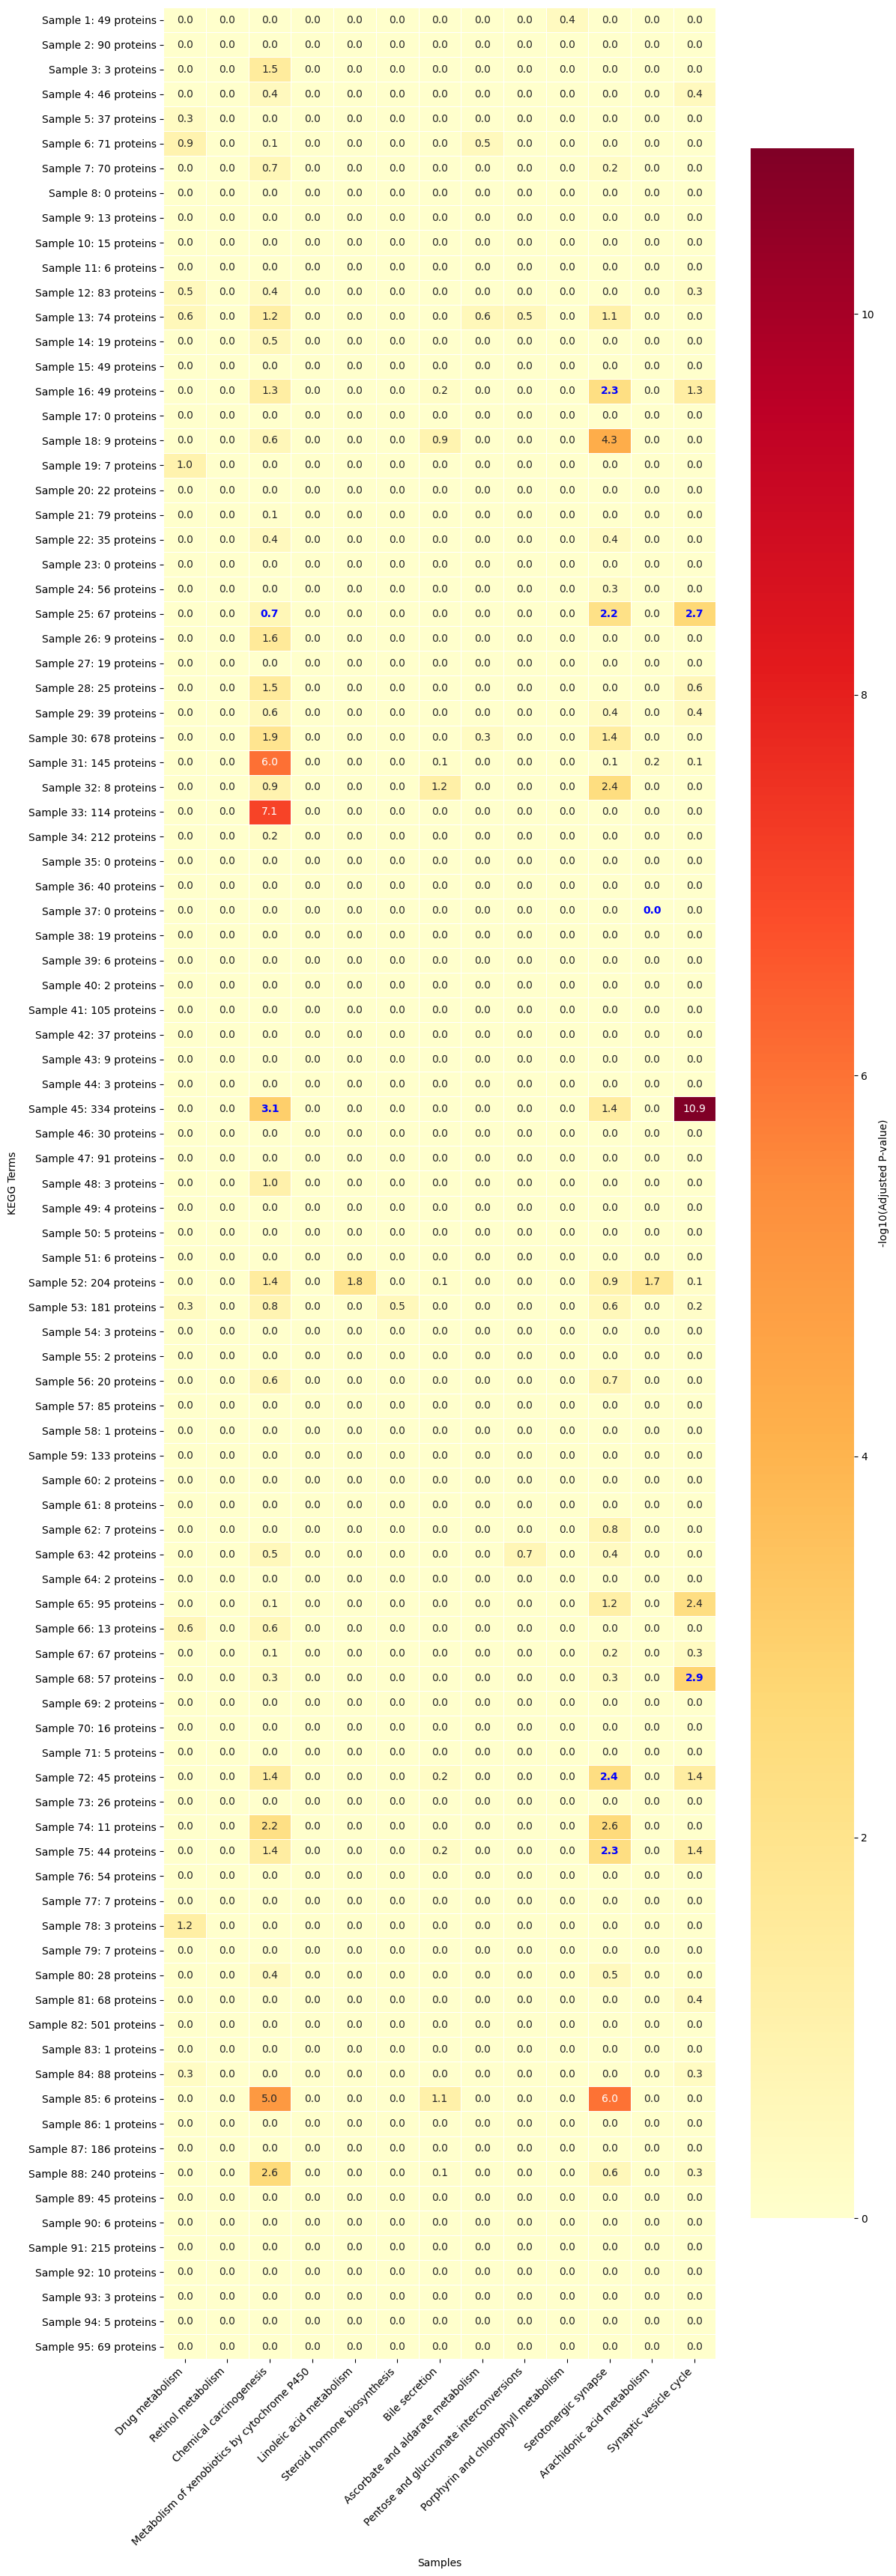

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 result 是原始数据（行=样本，列=GO/KEGG Terms）
start = 0
data = np.array(result[start:])  # 转置数据（行=Terms，列=样本）

# --- 自适应高度计算 ---
# 基础高度（每个Term分配0.3英寸，最小6英寸）
base_height = 6  
term_height = 0.3  # 每个Term的高度（英寸）
dynamic_height = base_height + term_height * data.shape[0]  # 根据行数调整

# 创建画布（宽度固定，高度动态）
plt.figure(figsize=(12, dynamic_height))

# 绘制热图
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    yticklabels=[f"Sample {i+1}: {number[i]} proteins" for i in range(len(result[start:]))],
    xticklabels=important_GO[start:],  # 直接使用GO/KEGG名称列表
    cbar_kws={"label": "-log10(Adjusted P-value)"},
    linewidths=0.5  # 添加细线分隔单元格
)

# 调整标签样式
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    ha='right',
    fontsize=10
)
ax.set_yticklabels(
    ax.get_yticklabels(), 
    fontsize=10,
    rotation=0  # 保证纵轴标签水平显示
)

# 设置轴标签
plt.xlabel("Samples", labelpad=10)
plt.ylabel("KEGG Terms", labelpad=10)

# 高亮特定单元格（根据buer矩阵）
for text in ax.texts:
    row, col = map(int, text.get_position())
    if buer[start:][col][row] == 1:  # 注意转置后行列索引变化
        text.set_color('blue')
        text.set_weight('bold')

# 自动调整布局
plt.tight_layout()
plt.show()

In [27]:
len(buer)

73

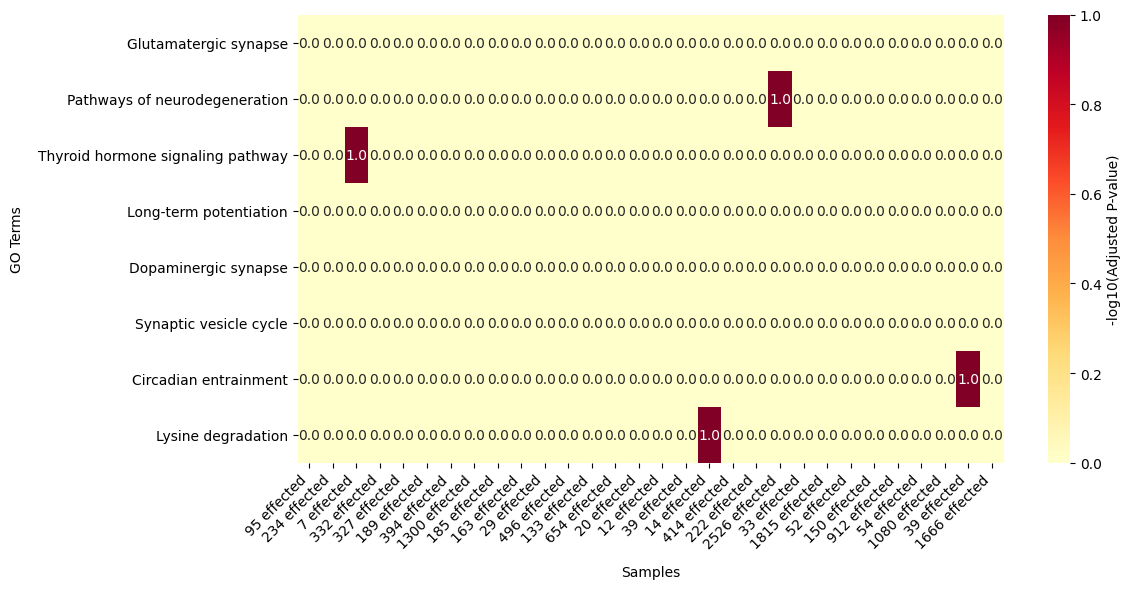

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 转换为 numpy 数组
data = np.array(buer).T  # 或 data = np.transpose(result)

# 绘制热图
plt.figure(figsize=(12, 6))  # 适当增加高度以适应旋转的标签

# 绘制热图
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    xticklabels=[f"{str(number[i])} effected" for i in range(len(result))],
    yticklabels=[f"{j}" for j in important_GO],
    cbar_kws={"label": "-log10(Adjusted P-value)"}  # 修改颜色条标签
)

# 旋转横轴标签45度，并右对齐
ax.set_xticklabels(ax.get_xticklabels(), 
                  rotation=45, 
                  ha='right',
                  fontsize=10)

# 调整纵轴标签字体
ax.set_yticklabels(ax.get_yticklabels(), 
                  fontsize=10)

# 添加标题和轴标签
# plt.title("Transposed Heatmap (8x12)", pad=20)
plt.xlabel("Samples", labelpad=10)
plt.ylabel("GO Terms", labelpad=10)

# 确保标签不被截断
plt.tight_layout()

plt.show()

In [39]:
sample = ASD_list[0]
use_gene = sample[0] + sample[1] + sample[3]
# print(len(use_gene))
# number.append(len(use_gene))
enr = gp.enrichr(gene_list=use_gene, # or "./tests/data/gene_list.txt",
             gene_sets=gene_sets,
             organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
             outdir=None, # don't write to disk
            )
pandas_use = enr.results
ooo = 7
item = pandas_use[pandas_use['Term'] == important_GO[ooo]]
print(important_GO[ooo])
if not item.empty:  # 检查是否找到匹配项
    p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
    print(-math.log10(p_value))
else:
    print(0)  # 未找到，填充 0

Lysine degradation
0.2375864067943114


In [12]:
import networkx as nx

# 从 GML 文件读取图
G = nx.read_gml('../manything/graph_ppi.gml')

KeyboardInterrupt: 

In [21]:
import pandas as pd
samples = pd.read_csv('../manything/ASD_use.csv')
samples = samples[samples['PrimaryPhenotype'] == 'Autism (ASD)']
samples['PrimaryPhenotype'].value_counts(), samples.shape

/tmp/ipykernel_438679/222384378.py:2: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  samples = pd.read_csv('../manything/ASD_use.csv')


(PrimaryPhenotype
 Autism (ASD)    4572
 Name: count, dtype: int64,
 (4572, 169))

In [31]:
def get_nerb(node_a, G):
    if node_a in G:
        connected_nodes = list(G.neighbors(node_a))
    else:
        connected_nodes = []
    return connected_nodes

In [36]:
# samples.iloc[1]['Gene.refGene']
i = 2
set(get_nerb(samples.iloc[i + 1]['Gene.refGene'], G)) == set(ASD_list[i][0] + ASD_list[i][1] + ASD_list[i][2] + ASD_list[i][3])

True

In [51]:
important_GO

['Glutamatergic synapse',
 'Pathways of neurodegeneration',
 'Thyroid hormone signaling pathway',
 'Long-term potentiation',
 'Dopaminergic synapse',
 'Synaptic vesicle cycle',
 'Circadian entrainment',
 'Lysine degradation']

In [3]:
import gseapy as gp
import math
gene_sets = {}
with open("../manything/CORUM.txt", 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        pathway = parts[0]
        genes = [g for g in parts[2:] if g]  # Skip empty strings
        gene_sets[pathway] = genes

# Perform enrichment analysis
ssss = {}
important_GO = []
for key in gene_sets.keys():
    ssss[key] = []
for use_gene in importants:
    sample_result = []
    # use_gene = sample[0] + sample[1] + sample[3]
    # print(len(use_gene))
    number.append(len(use_gene))
    enr = gp.enrichr(gene_list=use_gene, # or "./tests/data/gene_list.txt",
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
    pandas_use = enr.results
    
    for GO in gene_sets.keys():
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            ssss[GO].append(-math.log10(p_value))
        else:
            ssss[GO].append(0)  # 未找到，填充 0
    
    # result.append(normalize_to_zero_one(sample_result))
    result.append(sample_result)
    # if len(result) == 30:
    #     break
# Calculate the average for each GO term in ssss
average_scores = {go: (sum(scores) / len(scores) if scores else 0) for go, scores in ssss.items()}

# Find the top 5 GO terms with the highest average scores
top_5_go = sorted(average_scores.items(), key=lambda item: item[1], reverse=True)[:8]

# Print the results
important_GO = []
for go_term, avg_score in top_5_go:
    print("GO term:", go_term, "Average score:", avg_score)
    important_GO.append(go_term)

NameError: name 'importants' is not defined

In [115]:
top_5_go = sorted(average_scores.items(), key=lambda item: item[1], reverse=True)[:15]

# Print the results
important_GO = []
for go_term, avg_score in top_5_go:
    print("GO term:", go_term, "Average score:", avg_score)
    important_GO.append(go_term)
important_GO

GO term: LARC complex (LCR-associated remodeling complex) (human) Average score: 2.383374632678962
GO term: SWI-SNF chromatin remodeling-related-BRCA1 complex (human) Average score: 2.225616808359315
GO term: BRM-SIN3A complex (human) Average score: 2.1867535633170743
GO term: BRG1-SIN3A complex (human) Average score: 2.1066607538259166
GO term: BAF complex (human) Average score: 2.088443123604986
GO term: SIN3-ING1b complex II (human) Average score: 2.024210070824761
GO term: WINAC complex (human) Average score: 2.0179832249183103
GO term: ALL-1 supercomplex (human) Average score: 1.9996129994307044
GO term: BRM-SIN3A-HDAC complex (human) Average score: 1.9131041546663483
GO term: NuA4/Tip60-HAT complex A (human) Average score: 1.8776526878680329
GO term: p300-CBP-p270-SWI/SNF complex (human) Average score: 1.8555636104434226
GO term: DMAP1-associated complex (human) Average score: 1.6705943875392932
GO term: RSmad complex (human) Average score: 1.6426144935898315
GO term: EBAFb compl

['LARC complex (LCR-associated remodeling complex) (human)',
 'SWI-SNF chromatin remodeling-related-BRCA1 complex (human)',
 'BRM-SIN3A complex (human)',
 'BRG1-SIN3A complex (human)',
 'BAF complex (human)',
 'SIN3-ING1b complex II (human)',
 'WINAC complex (human)',
 'ALL-1 supercomplex (human)',
 'BRM-SIN3A-HDAC complex (human)',
 'NuA4/Tip60-HAT complex A (human)',
 'p300-CBP-p270-SWI/SNF complex (human)',
 'DMAP1-associated complex (human)',
 'RSmad complex (human)',
 'EBAFb complex (human)',
 'NCOR1 complex (human)']

In [116]:
import json
nnnn = 30
with open('../manything/pathway_analyse.json', 'r') as f:
    ASD_list = json.load(f)
result = []
for sample in ASD_list:
    sample_result = []
    use_gene = sample[0] + sample[1] + sample[3]
    print(len(use_gene))
    number.append(len(use_gene))
    enr = gp.enrichr(gene_list=use_gene, # or "./tests/data/gene_list.txt",
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
    pandas_use = enr.results
    for GO in important_GO:
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            sample_result.append(-math.log10(p_value))
        else:
            sample_result.append(0)  # 未找到，填充 0
    for GO in gene_sets.keys():
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            ssss[GO].append(-math.log10(p_value))
        else:
            ssss[GO].append(0)  # 未找到，填充 0
    
    # result.append(normalize_to_zero_one(sample_result))
    result.append(sample_result)
    if len(result) == nnnn:
        break
ssss = {}
for key in gene_sets.keys():
    ssss[key] = []
buer = []
for idx, sample in enumerate(ASD_list):
    sample_buer = []
    # print(len(use_gene))
    pandas_use = enr.results
    geneuse = samples.iloc[idx]['Gene.refGene']
    for GO in important_GO:
        
        if geneuse in gene_sets[GO]:  # 检查是否找到匹配项
            sample_buer.append(1)
            print(geneuse, GO, idx)
        else:
            sample_buer.append(0)  # 未找到，填充 0
    buer.append(sample_buer)
    if len(buer) == nnnn:
        break

95
234
7
332
327
189
394
1300
185
163
29
496
133
654
20
12
39
14
414
222
2526
33
1815
52
150
912
54
1080
39
1666


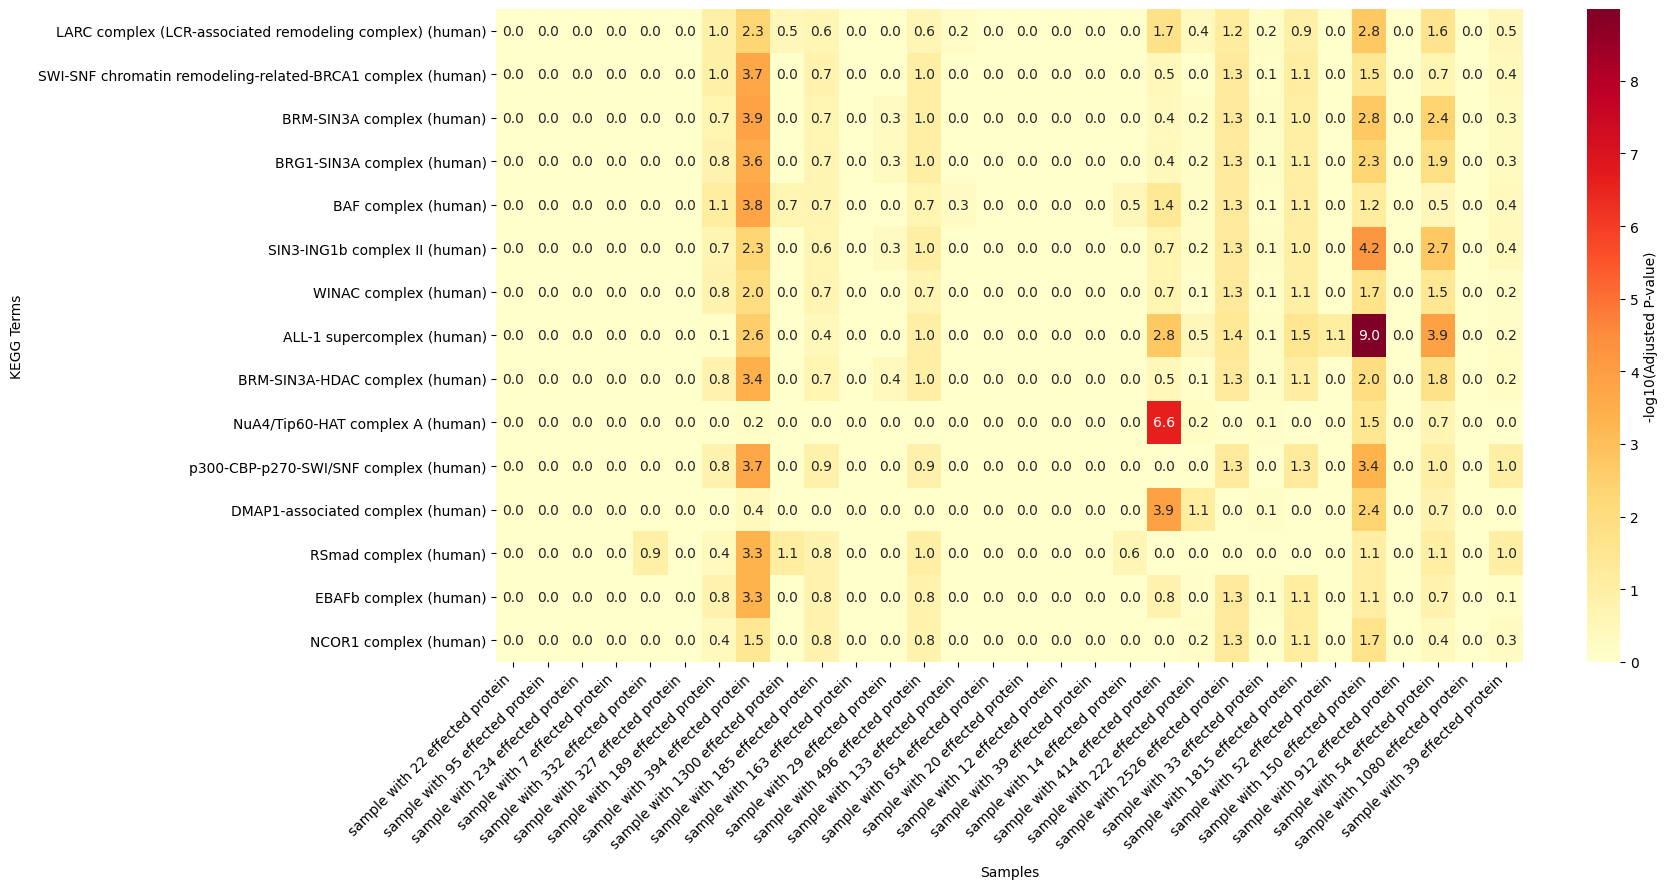

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 转换为 numpy 数组
start = 0
data = np.array(result[start:]).T  # 或 data = np.transpose(result)

# 绘制热图
plt.figure(figsize=(18, 9))  # 适当增加高度以适应旋转的标签

# 绘制热图
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    xticklabels=[f"sample with {str(number[i])} effected protein" for i in range(len(result[start:]))],
    yticklabels=[f"{j}" for j in important_GO],
    cbar_kws={"label": "-log10(Adjusted P-value)"}  # 修改颜色条标签
)

# 旋转横轴标签45度，并右对齐
ax.set_xticklabels(ax.get_xticklabels(), 
                  rotation=45, 
                  ha='right',
                  fontsize=10)

# 调整纵轴标签字体
ax.set_yticklabels(ax.get_yticklabels(), 
                  fontsize=10)

# 添加标题和轴标签
# plt.title("Transposed Heatmap (8x12)", pad=20)
plt.xlabel("Samples", labelpad=10)
plt.ylabel("KEGG Terms", labelpad=10)

for text in ax.texts:
    # 获取当前文本的位置（行和列）
    row, col = text.get_position()
    # if int(row) == 2 and int(col) == 3:  # 第3行第4列（索引从0开始）
    if buer[start:][int(row)][int(col)] == 1:
        text.set_color('blue')  # 修改颜色
        text.set_weight('bold')  # 可选：加粗
# 确保标签不被截断
plt.tight_layout()

plt.show()

IndexError: list index out of range

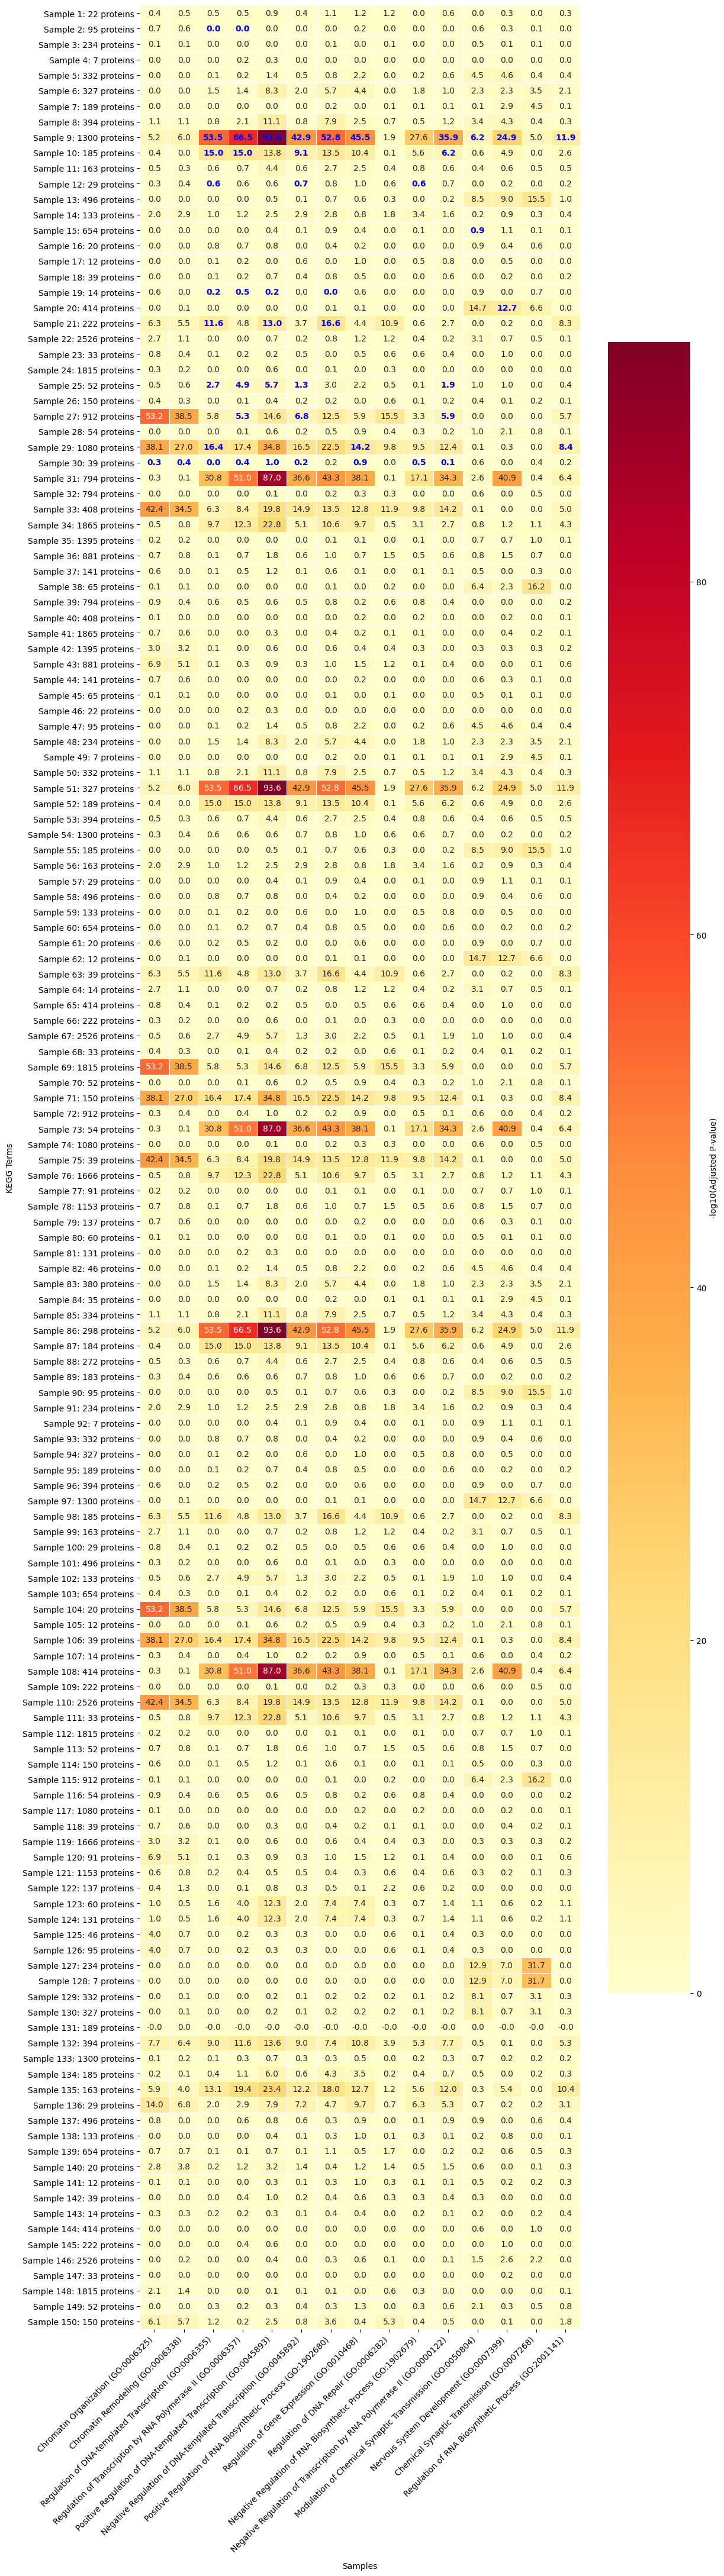

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 result 是原始数据（行=样本，列=GO/KEGG Terms）
start = 0
data = np.array(result)  # 转置数据（行=Terms，列=样本）

# --- 自适应高度计算 ---
# 基础高度（每个Term分配0.3英寸，最小6英寸）
base_height = 6  
term_height = 0.3  # 每个Term的高度（英寸）
dynamic_height = base_height + term_height * data.shape[0]  # 根据行数调整

# 创建画布（宽度固定，高度动态）
plt.figure(figsize=(12, dynamic_height))

# 绘制热图
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    yticklabels=[f"Sample {i+1}: {number[i]} proteins" for i in range(len(result[start:]))],
    xticklabels=important_GO[start:],  # 直接使用GO/KEGG名称列表
    cbar_kws={"label": "-log10(Adjusted P-value)"},
    linewidths=0.5  # 添加细线分隔单元格
)

# 调整标签样式
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    ha='right',
    fontsize=10
)
ax.set_yticklabels(
    ax.get_yticklabels(), 
    fontsize=10,
    rotation=0  # 保证纵轴标签水平显示
)

# 设置轴标签
plt.xlabel("Samples", labelpad=10)
plt.ylabel("KEGG Terms", labelpad=10)

# 高亮特定单元格（根据buer矩阵）
for text in ax.texts:
    row, col = map(int, text.get_position())
    if buer[col][row] == 1:  # 注意转置后行列索引变化
        text.set_color('blue')
        text.set_weight('bold')

# 自动调整布局
plt.tight_layout()
plt.show()

In [12]:
import gseapy as gp
import math
gene_sets = {}
import pandas as pd
samples = pd.read_csv('../manything/ASD_use.csv')
samples = samples[samples['PrimaryPhenotype'] == 'Autism (ASD)']
samples['PrimaryPhenotype'].value_counts(), samples.shape
with open("../manything/CORUM.txt", 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        pathway = parts[0]
        genes = [g for g in parts[2:] if g]  # Skip empty strings
        gene_sets[pathway] = genes

for sample_index in range(len(ASD_list)):
    sample = ASD_list[sample_index]
    effected = sample[0] + sample[1] + sample[3]
    gene_with_mutation = {}
    for pathway in gene_sets.keys():
        if samples.iloc[sample_index]['Gene.refGene'] in gene_sets[pathway]:
            gene_with_mutation[pathway] = gene_sets[pathway]
    if len(gene_with_mutation) != 0 :
        print(samples.iloc[sample_index]['Gene.refGene'], sample_index)


/tmp/ipykernel_2983813/1051916321.py:5: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  samples = pd.read_csv('../manything/ASD_use.csv')


DAG1 4
MPDZ 12
TUBA1A 21
POLR2A 28
TOP1 32
ELK1 33
AP3B2 38
INPP5K 56
ITK 57
MOV10 59


In [13]:
import gseapy as gp
import math
import json
gene_sets = {}
import pandas as pd
from gseapy import barplot, dotplot
with open('../manything/pathway_analyse1.json', 'r') as f:
    ASD_list = json.load(f)
samples = pd.read_csv('../manything/ASD_use.csv')
samples = samples[samples['PrimaryPhenotype'] == 'Autism (ASD)']
samples['PrimaryPhenotype'].value_counts(), samples.shape
with open("../manything/CORUM.txt", 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        pathway = parts[0]
        genes = [g for g in parts[2:] if g]  # Skip empty strings
        gene_sets[pathway] = genes
#21的三个蛋白复合物两个与神经退行疾病相关
sample_index = 28
sample = ASD_list[sample_index]
effected = sample[0] + sample[1] + sample[3]
gene_with_mutation = {}
for pathway in gene_sets.keys():
    if samples.iloc[sample_index]['Gene.refGene'] in gene_sets[pathway]:
        gene_with_mutation[pathway] = gene_sets[pathway]
len(gene_with_mutation)
enr = gp.enrichr(gene_list=effected, # or "./tests/data/gene_list.txt",
             gene_sets=gene_with_mutation,
             organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
             outdir=None, # don't write to disk
            )
enr.results.head()

/tmp/ipykernel_276271/2349228147.py:9: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  samples = pd.read_csv('../manything/ASD_use.csv')


Gene_set                                               Term Overlap  \
0  gs_ind_0  Actin-ribonucleoprotein complex (POLR2A, GTF2F...     2/3   
1  gs_ind_0                 BRCA1-BARD1-POLR2A complex (human)     2/3   
2  gs_ind_0            BRCA1-RNA polymerase II complex (human)   14/26   
3  gs_ind_0       BRCA1-core RNA polymerase II complex (human)    6/13   
4  gs_ind_0                         CSA-POLIIa complex (human)    7/14   

    P-value  Adjusted P-value  Odds Ratio  Combined Score  \
0  0.523932          0.949685    1.596491        1.031962   
1  0.523932          0.949685    1.596491        1.031962   
2  0.484046          0.949685    1.127324        0.817958   
3  0.763937          0.949685    0.786973        0.211908   
4  0.661929          0.949685    0.929412        0.383473   

                                               Genes  
0                                      GTF2F1;HNRNPU  
1                                        BRCA1;BARD1  
2  GTF2H1;TBP;POLR2B;POLR2I;GTF2E2;BRCA1;POLR2L;G...  
3           POLR2B;POLR2I;BRCA1;POLR2L;POLR2E;POLR2K  
4           COPS5;RBX1;COPS4;COPS7A;DDB1;COPS6;CUL4A

In [14]:
enr.results['Term'].tolist()

['Actin-ribonucleoprotein complex (POLR2A, GTF2F1, HNRNPU) (human)',
 'BRCA1-BARD1-POLR2A complex (human)',
 'BRCA1-RNA polymerase II complex (human)',
 'BRCA1-core RNA polymerase II complex (human)',
 'CSA-POLIIa complex (human)',
 'HES1 promoter corepressor complex (human)',
 'HES1 promoter-Notch enhancer complex (human)',
 'Integrator-RNAPII complex (human)',
 'POLR2A-CCNT1-CDK9-NCL-LEM6-CPSF2 complex (human)',
 'Pre-initiation complex (PIC) (human)',
 'RNA pol II containing coactivator complex Tat-SF (human)',
 'RNA polymerase II (RNAPII) (human)',
 'RNA polymerase II complex, chromatin structure modifying (human)',
 'RNA polymerase II core complex (human)',
 'RNA polymerase II holoenzyme complex (human)',
 'SMN-PolII-RHA complex (human)']

In [9]:
GOOO = 'RICH1/AMOT polarity complex, Flag-Amot precipitated (human)'
for nnna in gene_sets[GOOO]:
    print(nnna)

MPP5
AMOTL1
INADL
AMOTL2
ARHGAP17
MPDZ
MPP7
AMOT


In [17]:
import gseapy as gp
import math
gene_sets = {}
import pandas as pd
# samples = pd.read_csv('../manything/ASD_use.csv')
# samples = samples[samples['PrimaryPhenotype'] == 'Autism (ASD)']
# samples['PrimaryPhenotype'].value_counts(), samples.shape
with open("../manything/KEGG_2021_Human.txt", 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        pathway = parts[0]
        genes = [g for g in parts[2:] if g]  # Skip empty strings
        gene_sets[pathway] = genes

# Perform enrichment analysis

# important_GO = [
#     "Amino acid metabolism",
#     "Neuroactive ligand-receptor interaction",
#     "Cytokine-cytokine receptor interaction",
#     "Calcium signaling pathway",
#     "Synaptic vesicle cycle"
# ]
ssss = {}
for key in gene_sets.keys():
    ssss[key] = []
result = []
number = []

nnnn = 30
import json
with open('../manything/disease_newPPI.json', 'r') as f:
    ASD_list = json.load(f)
for idx, sample_dict in enumerate(ASD_list):
    sample_result = []
    sample = sample_dict['nab']
    use_gene = sample[0] + sample[1] + sample[3]# + [samples.iloc[idx]['Gene.refGene']]
    if len(use_gene) == 0:
        result.append([0 for _ in range(len(important_GO))])
        number.append(len(use_gene))
        continue
    # print(len(use_gene))
    number.append(len(use_gene))
    enr = gp.enrichr(gene_list=use_gene, # or "./tests/data/gene_list.txt",
                 gene_sets=gene_sets,
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )
    pandas_use = enr.results
    for GO in important_GO:
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            sample_result.append(-math.log10(p_value))
        else:
            sample_result.append(0)  # 未找到，填充 0
    for GO in gene_sets.keys():
        item = pandas_use[pandas_use['Term'] == GO]
        if not item.empty:  # 检查是否找到匹配项
            p_value = item['Adjusted P-value'].values[0]  # 提取 P-value
            ssss[GO].append(-math.log10(p_value))
        else:
            ssss[GO].append(0)  # 未找到，填充 0
    
    # result.append(normalize_to_zero_one(sample_result))
    result.append(sample_result)
    if len(result) == nnnn:
        break
ssss = {}
for key in gene_sets.keys():
    ssss[key] = []
buer = []
for idx, sample in enumerate(ASD_list):
    sample_buer = []
    # print(len(use_gene))
    pandas_use = enr.results
    geneuse = sample['mutation']
    for GO in important_GO:
        
        if geneuse in gene_sets[GO]:  # 检查是否找到匹配项
            sample_buer.append(1)
            print(geneuse, GO, idx)
        else:
            sample_buer.append(0)  # 未找到，填充 0
    buer.append(sample_buer)
    if len(buer) == nnnn:
        break

KMT2A Lysine degradation 12
TUBA1A Pathways of neurodegeneration 14
PER1 Circadian entrainment 20


In [16]:
len(number), len(result[start:])

(23, 30)

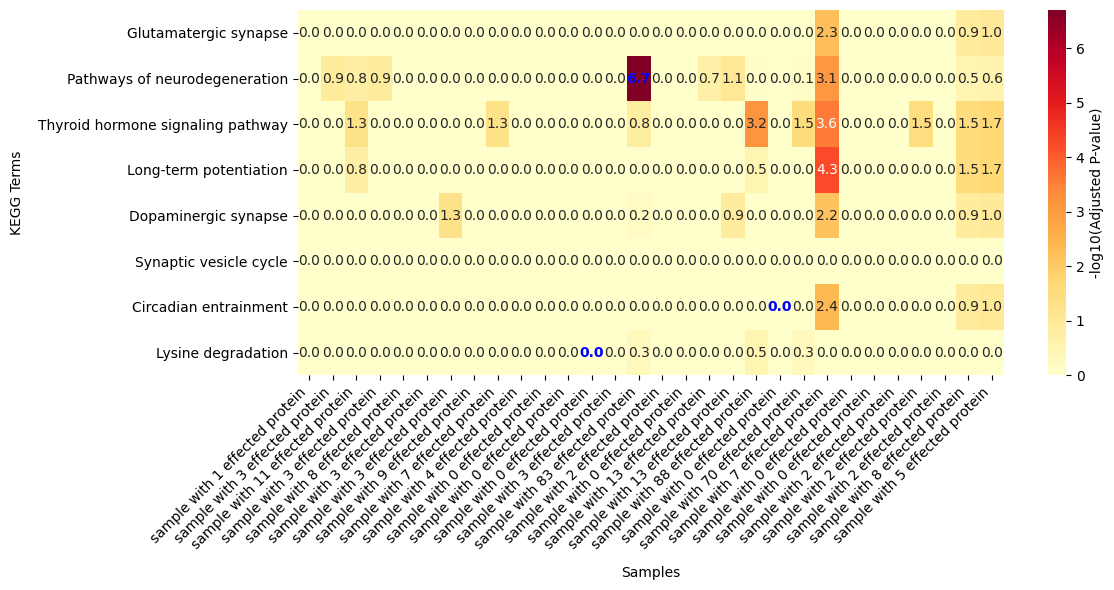

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 转换为 numpy 数组
start = 0
data = np.array(result[start:]).T  # 或 data = np.transpose(result)

# 绘制热图
plt.figure(figsize=(12, 6))  # 适当增加高度以适应旋转的标签

# 绘制热图
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    xticklabels=[f"sample with {str(number[i])} effected protein" for i in range(len(result[start:]))],
    yticklabels=[f"{j}" for j in important_GO],
    cbar_kws={"label": "-log10(Adjusted P-value)"}  # 修改颜色条标签
)

# 旋转横轴标签45度，并右对齐
ax.set_xticklabels(ax.get_xticklabels(), 
                  rotation=45, 
                  ha='right',
                  fontsize=10)

# 调整纵轴标签字体
ax.set_yticklabels(ax.get_yticklabels(), 
                  fontsize=10)

# 添加标题和轴标签
# plt.title("Transposed Heatmap (8x12)", pad=20)
plt.xlabel("Samples", labelpad=10)
plt.ylabel("KEGG Terms", labelpad=10)

for text in ax.texts:
    # 获取当前文本的位置（行和列）
    row, col = text.get_position()
    # if int(row) == 2 and int(col) == 3:  # 第3行第4列（索引从0开始）
    if buer[start:][int(row)][int(col)] == 1:
        text.set_color('blue')  # 修改颜色
        text.set_weight('bold')  # 可选：加粗
# 确保标签不被截断
plt.tight_layout()

plt.show()

In [4]:
enr = gp.enrichr(gene_list=importants[0], # or "./tests/data/gene_list.txt",
             gene_sets=gene_sets,
             organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
             outdir=None, # don't write to disk
            )
enr.results.to_csv('/data/lyk/manything/EE_importantgene1.csv')

In [5]:
# gene_sets[important_GO[GO_index]]
result_f = []
for gene in importants[0]:
    ggg = []
    for GO_index in range(len(important_GO)):
        if gene in gene_sets[important_GO[GO_index]]:
            ggg.append(1)
        else:
            ggg.append(0)
    result_f.append(ggg)

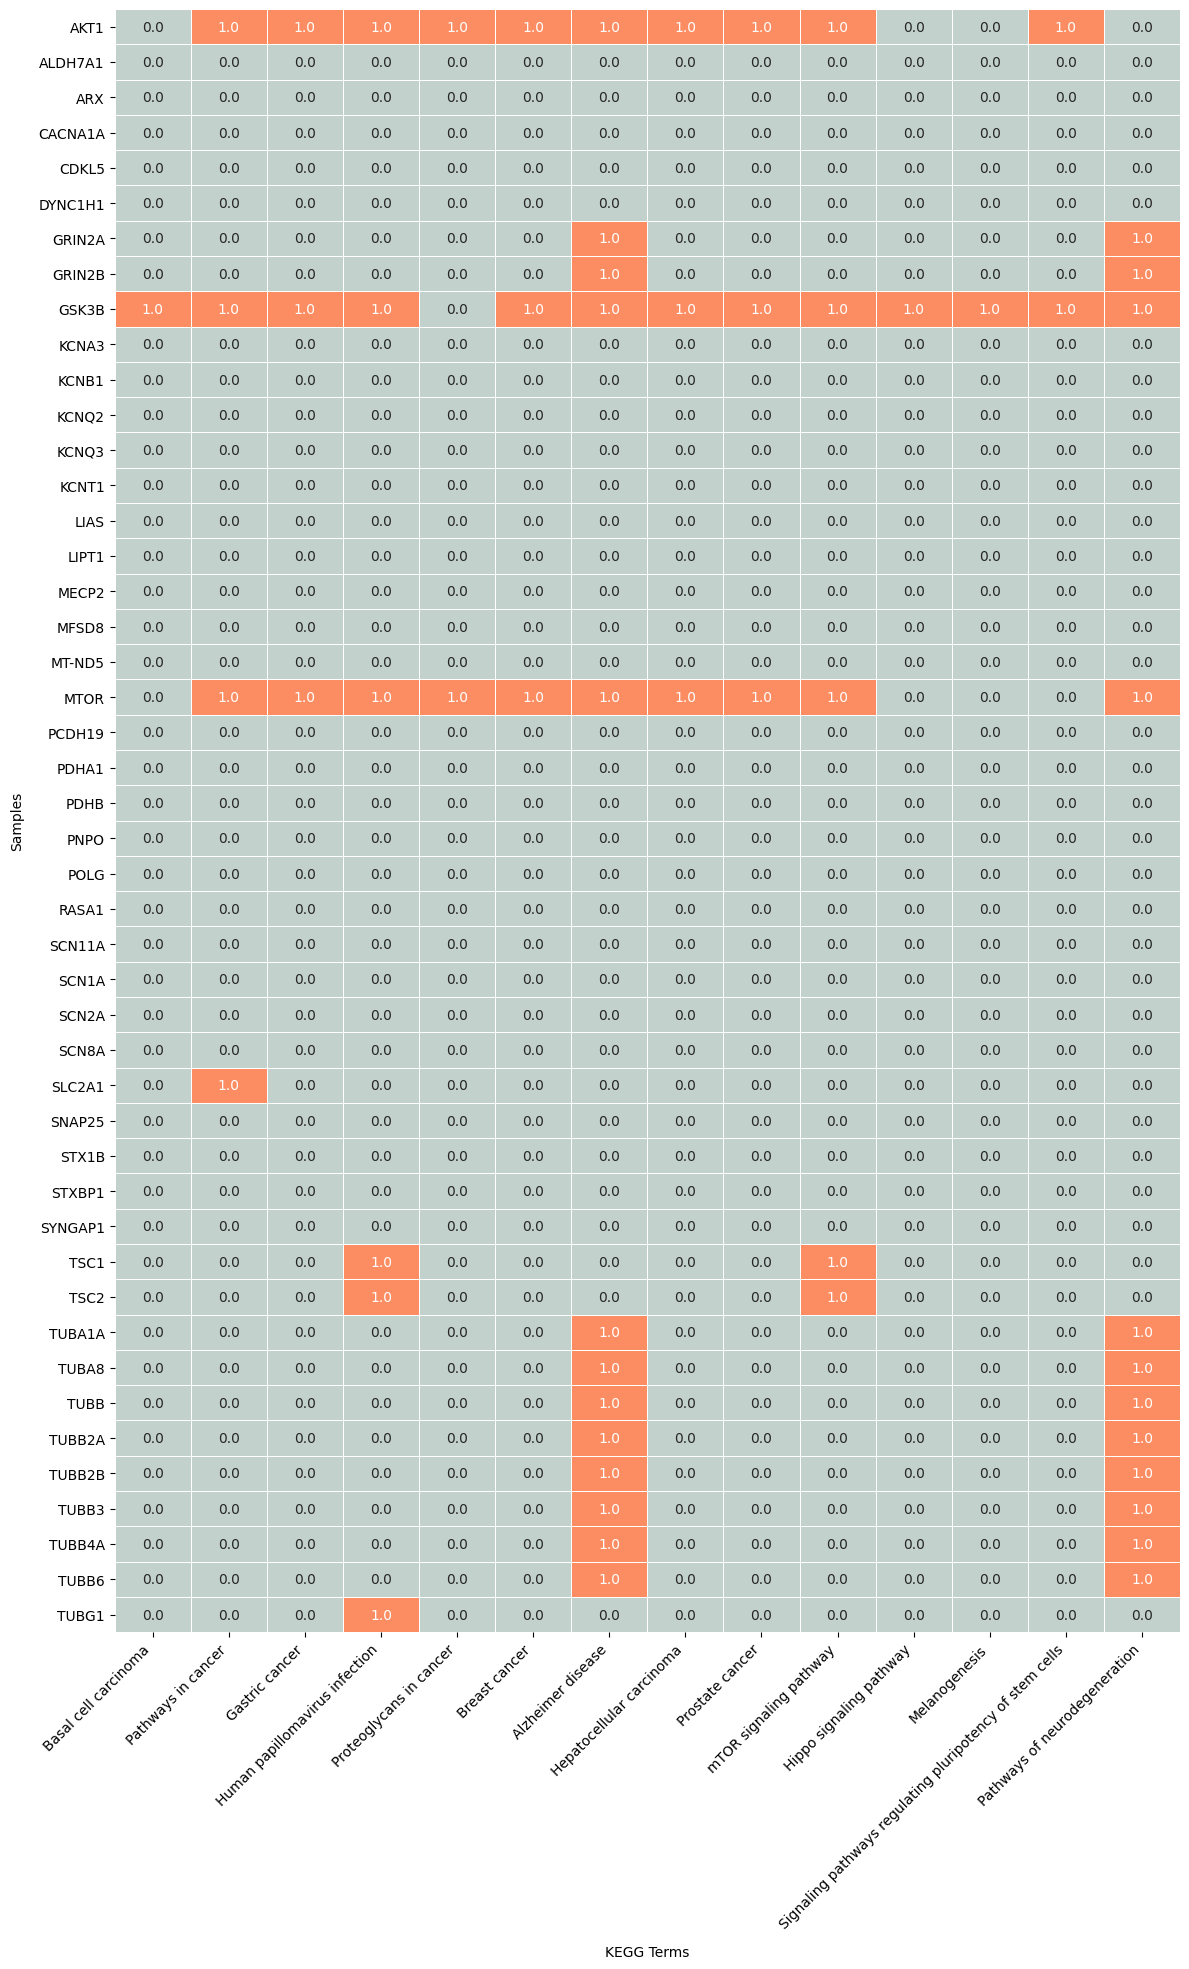

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# 假设 result 是原始数据（行=样本，列=GO/KEGG Terms）
start = 0
data = np.array(result_f)  # 转置数据（行=Terms，列=样本）

# --- 自定义色板 (白色 -> #fc8d62) ---
colors = ["#c3d1cc", "#fc8d62"]  # 从白色过渡到目标颜色
custom_cmap = LinearSegmentedColormap.from_list("custom_orange", colors)

# --- 自适应高度计算 ---
# 基础高度（每个Term分配0.3英寸，最小6英寸）
base_height = 6  
term_height = 0.3  # 每个Term的高度（英寸）
dynamic_height = base_height + term_height * data.shape[0]  # 根据行数调整

# 创建画布（宽度固定，高度动态）
plt.figure(figsize=(12, dynamic_height))

# 绘制热图（使用自定义色板）
ax = sns.heatmap(
    data,
    annot=True,
    fmt=".1f",
    cmap=custom_cmap,  # 使用自定义色板
    cbar=False,
    yticklabels=importants[0],
    xticklabels=important_GO[start:],  # 直接使用GO/KEGG名称列表
    linewidths=0.5  # 添加细线分隔单元格
)

# 调整标签样式
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    ha='right',
    fontsize=10
)
ax.set_yticklabels(
    ax.get_yticklabels(), 
    fontsize=10,
    rotation=0  # 保证纵轴标签水平显示
)

# 设置轴标签
plt.xlabel("KEGG Terms", labelpad=10)
plt.ylabel("Samples", labelpad=10)

# 高亮特定单元格（根据buer矩阵）
# for text in ax.texts:
#     row, col = map(int, text.get_position())
#     if buer[start:][col][row] == 1:  # 注意转置后行列索引变化
#         text.set_color('#3b76fb')
#         text.set_weight('bold')
# plt.savefig('../manything/EE_hotplot.png', dpi=500, bbox_inches='tight')
# 自动调整布局
plt.tight_layout()
plt.show()

In [13]:
import networkx as nx

def get_shortest_paths_to_nodes(G, start, targets):
    # print(start, targets)
    all_paths = []
    min_length = 10
    for target in targets:
        # 获取从 start 到 target 的所有最短路径
        paths = list(nx.all_shortest_paths(G, source=start, target=target))
        all_paths = all_paths + paths
        min_length = min(min_length, len(paths[0]))


    # 获取最短路径的长度
    # 只保留长度等于最短长度的路径
    # print(min_length)
    all_paths = [path for path in all_paths if len(path) == min_length]
    
    return all_paths

In [25]:
get_shortest_paths_to_nodes(G, CDH_list[2]['mutation'], importants[0])

[['MAPT', 'AKT1'],
 ['MAPT', 'GSK3B'],
 ['MAPT', 'STX1B'],
 ['MAPT', 'STXBP1'],
 ['MAPT', 'TUBA1A'],
 ['MAPT', 'TUBA8'],
 ['MAPT', 'TUBB'],
 ['MAPT', 'TUBB2A'],
 ['MAPT', 'TUBB2B'],
 ['MAPT', 'TUBB3'],
 ['MAPT', 'TUBB4A'],
 ['MAPT', 'TUBB6']]

In [36]:
import json
from collections import Counter

with open('../manything/distance_EE_onlt_phy.json', 'r') as f:
    distances = json.load(f)
len(distances),distances[0]
with open('../manything/disease_onlyp_EE.json', 'r') as f:
    disease_unprocess = json.load(f)
disease_sep = []
for sample in disease_unprocess:
    disease = [[[] for _ in range(4)] for _ in range(len(distances))]
    for i in range(len(distances)):
        for value, llll in enumerate(sample['nab']):
            for key in llll:
                disease[i][value].append(distances[i][key])
    disease_sep.append(disease)
# 打印读取的数据
len(disease_sep[2][0][0] + disease_sep[2][0][1]+disease_sep[2][0][2]+disease_sep[2][0][3]), len(disease_sep[2])

(742, 7)

In [46]:
utilized = [[[] for _ in range(4)] for _ in range(6)]
for value, llll in enumerate(CDH_list[2]['nab']):
    for iiii in llll:
        utilized[distances[0][iiii]][value].append(iiii)

In [48]:
utilized

[[[],
  [],
  ['STX1B',
   'TUBB2B',
   'TUBB4A',
   'TUBB6',
   'TUBB3',
   'GSK3B',
   'TUBB',
   'TUBB2A',
   'STXBP1',
   'TUBA1A'],
  ['TUBA8', 'AKT1']],
 [['MAPK1', 'MAPK14', 'YWHAH', 'YWHAG', 'RPS3A'],
  ['RPL8',
   'YWHAE',
   'NPM1',
   'RPL4',
   'HNRNPD',
   'DLST',
   'YWHAB',
   'NUB1',
   'HNRNPU',
   'YWHAZ',
   'PFKM'],
  ['FKBP4',
   'PPP5C',
   'SIRT1',
   'SF3A1',
   'ST13',
   'FKBP3',
   'AHSA1',
   'APEX1',
   'EEF1A2',
   'CSNK2A1',
   'PPP2CB',
   'HNRNPL',
   'CDC37',
   'RPL18A',
   'GSK3A',
   'RBM28',
   'EDF1',
   'PPIF',
   'RPL19',
   'WNT3',
   'RPS6KB1',
   'DDX5',
   'JADE1',
   'YBX3',
   'MLH1',
   'EIF2AK2',
   'MAPRE3',
   'CTSD',
   'TARDBP',
   'MAPK8IP1',
   'CLTA',
   'LRP1',
   'PLCG1',
   'SRSF6',
   'C3',
   'HSPB1',
   'SIRT2',
   'APOE',
   'TRIM28',
   'FUS',
   'H3-3B',
   'VPS4A',
   'EIF2S1',
   'CCT7',
   'IGF2BP3',
   'RPL35',
   'SYT1',
   'PSMC1',
   'CSNK1A1',
   'SMAD2',
   'DNAJB6',
   'CREBBP',
   'MARK4',
   'CAPZA1',
   'SYP'

In [49]:
with open('/data/lyk/manything/EEsample2.json', 'w') as json_file:
    json.dump(utilized, json_file)

In [111]:
print(208/(208 + 5 + 4 + 4))

0.9411764705882353


In [56]:
ieie = []
for eeii in utilized:
    rrrr = {}
    gggg = eeii[0]+eeii[1]+eeii[2]+eeii[3]
    for i in range(len(important_GO)):
        rrrr[important_GO[i]] = list(set(gene_sets[important_GO[i]]) & set(gggg))
    ieie.append(rrrr)
ieie

[{'Basal cell carcinoma': ['GSK3B'],
  'Pathways in cancer': ['GSK3B', 'AKT1'],
  'Gastric cancer': ['GSK3B', 'AKT1'],
  'Human papillomavirus infection': ['GSK3B', 'AKT1'],
  'Proteoglycans in cancer': ['AKT1'],
  'Breast cancer': ['GSK3B', 'AKT1'],
  'Alzheimer disease': ['TUBB6',
   'TUBA8',
   'TUBB',
   'TUBB3',
   'TUBB2B',
   'TUBB4A',
   'AKT1',
   'TUBB2A',
   'GSK3B',
   'TUBA1A'],
  'Hepatocellular carcinoma': ['GSK3B', 'AKT1'],
  'Prostate cancer': ['GSK3B', 'AKT1'],
  'mTOR signaling pathway': ['GSK3B', 'AKT1'],
  'Hippo signaling pathway': ['GSK3B'],
  'Melanogenesis': ['GSK3B'],
  'Signaling pathways regulating pluripotency of stem cells': ['GSK3B',
   'AKT1'],
  'Pathways of neurodegeneration': ['TUBB6',
   'TUBA8',
   'TUBB',
   'TUBB3',
   'TUBB2B',
   'TUBB4A',
   'TUBB2A',
   'GSK3B',
   'TUBA1A']},
 {'Basal cell carcinoma': ['WNT3', 'CTNNB1'],
  'Pathways in cancer': ['EGFR',
   'PLCG2',
   'ABL1',
   'MAPK9',
   'TRAF6',
   'CDK2',
   'CCNA2',
   'MAPK1',
   'PRKA

In [57]:
with open('/data/lyk/manything/EEsample_pathway2.json', 'w') as json_file:
    json.dump(ieie, json_file)

In [59]:
important_GO[1]

'Pathways in cancer'

In [71]:
set(list(G.neighbors('AKT1'))) & set(utilized[1][0]) & set(ieie[1][important_GO[1]])

{'MAPK1'}

In [94]:
distance = 1
set(list(G.neighbors('GSK3B'))) & set(utilized[distance][0]) - set(ieie[distance][important_GO[1]])

{'MAPK14'}

In [104]:
distance = 0
set(utilized[distance][3]) & set(ieie[distance][important_GO[1]])

{'AKT1'}

In [105]:
distance = 0
set(utilized[distance][2]) & set(ieie[distance][important_GO[1]])

{'GSK3B'}

In [91]:
distance = 0
set(utilized[distance][2]) & set(ieie[distance][important_GO[1]])

{'GSK3B'}

In [101]:
distance = 2
set(list(G.neighbors('MAPK14'))) & set(utilized[distance][2]) - set(ieie[distance][important_GO[1]])

{'DUSP1', 'MAPK11', 'MAPK13', 'MARCKSL1', 'PPM1G', 'PRDX1', 'S100B'}

In [108]:
llllll = ['AKT1', 'CASP3', 'CASP1', 'MAPT', 'GSK3B', 'MAPK14', 'MAPK13']
set(llllll) & set(CDH_list[2]['nab'][0]), set(llllll) & set(CDH_list[2]['nab'][1]), set(llllll) & set(CDH_list[2]['nab'][2]), set(llllll) & set(CDH_list[2]['nab'][3])

({'MAPK14'}, set(), {'CASP1', 'GSK3B', 'MAPK13'}, {'AKT1', 'CASP3'})